# Котировки (Московской биржи) с Финама

In [1]:
# import os
# import sys
# from pyspark import SparkContext
# from pyspark.sql import SQLContext
# import pyspark.sql.types as sqlt
# import pyspark.sql.functions as sqlf
# from pyspark import SparkConf
# try:
#     sc.stop()
# except:
#     pass
# os.environ['PYSPARK_PYTHON'] = sys.executable
# os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

# #HDFS_MASTER = 'hadoop-master'
# conf = SparkConf()
# conf.setMaster('yarn')
# conf.setAppName('moex')
# sc = SparkContext(conf=conf)
# sqlContext = SQLContext(sc)
# spark = sqlContext
# sql = spark.sql

In [2]:
# Библиотеки
import pandas as pd
import numpy as np

import requests
import urllib.request
from urllib.parse import urlencode
from urllib.request import urlopen

import io
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from pylab import rcParams


import datetime
from datetime import datetime, date, timedelta

# import html5lib

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set()

In [4]:
print('Hello world!')

Hello world!


In [5]:
# # Период анализа
# data_start = input('Введите начальную дату в формате YYYY-MM-DD: ')
# d_end = input('Введите конечную дату (0 - текущая дата, 1 - пользовательская дата): ')
# if d_end == "0":
#     data_end = str(date.today())
# else:
#     data_end = input('Введите дату в формате YYYY-MM-DD: ')
# print("Выбранный период: c", data_start, 'по', data_end)

In [6]:
# date_format = "%Y-%m-%d"

# isValidDate = True
# try:
#     datetime.strptime(data_start, date_format)
# except ValueError:
#     isValidDate = False

# if(isValidDate):
#     print("Input date is valid ..")
# else:
#     print("Input date is not valid..")

In [7]:
# date_format = "%Y-%m-%d"

# isValidDate = True
# try:
#     datetime.strptime(data_end, date_format)
# except ValueError:
#     isValidDate = False

# if(isValidDate):
#     print("Input date is valid ..")
# else:
#     print("Input date is not valid..")

# Парсим данных

In [8]:
data_start = '2018-01-01'
data_end = str(date.today())

In [9]:
# Начальная дата
t0 = '.'.join(reversed(data_start.split('-')))
t01 = t0.split('.')[2]
t02 = str(int(t0.split('.')[1])-1)
t03 = t0.split('.')[0]

In [10]:
# Конечная дата
t1 = '.'.join(reversed(data_end.split('-')))
t11 = t1.split('.')[2]
t12 = str(int(t1.split('.')[1])-1)
t13 = t1.split('.')[0]

In [11]:
p = 8 # период день
p1 = 7 # период час

In [12]:
# from urllib.parse import urlencode
# from urllib.request import urlopen
# #пользовательские переменные
# ticker="SBER" #задаём тикер
# period=7 # задаём период. Выбор из: 'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10
# start = "01.01.2017" #с какой даты начинать тянуть котировки
# end = "31.12.2017" #финальная дата, по которую тянуть котировки
# ########
# periods={'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10}
# print ("ticker="+ticker+"; period="+str(period)+"; start="+start+"; end="+end)
# #каждой акции Финам присвоил цифровой код:
# tickers={'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001}
# FINAM_URL = "http://export.finam.ru/"
# market = 0 #можно не задавать. Это рынок, на котором торгуется бумага. Для акций работает с любой цифрой.
# #Делаем преобразования дат:
# start_date = datetime.strptime(start, "%d.%m.%Y").date()
# start_date_rev=datetime.strptime(start, '%d.%m.%Y').strftime('%Y%m%d')
# end_date = datetime.strptime(end, "%d.%m.%Y").date()
# end_date_rev=datetime.strptime(end, '%d.%m.%Y').strftime('%Y%m%d')
# #Все параметры упаковываем в единую структуру:
# params = urlencode([
# 					('market', market), #на каком рынке торгуется бумага
# 					('em', tickers[ticker]), #вытягиваем цифровой символ, который соответствует бумаге.
# 					('code', ticker), #тикер нашей акции
# 					('apply',0), #не нашёл что это значит. 
# 					('df', start_date.day), #Начальная дата, номер дня (1-31)
# 					('mf', start_date.month - 1), #Начальная дата, номер месяца (0-11)
# 					('yf', start_date.year), #Начальная дата, год
# 					('from', start_date), #Начальная дата полностью
# 					('dt', end_date.day), #Конечная дата, номер дня	
# 					('mt', end_date.month - 1), #Конечная дата, номер месяца
# 					('yt', end_date.year), #Конечная дата, год
# 					('to', end_date), #Конечная дата
# 					('p', period), #Таймфрейм
# 					('f', ticker+"_" + start_date_rev + "_" + end_date_rev), #Имя сформированного файла
# 					('e', ".csv"), #Расширение сформированного файла
# 					('cn', ticker), #ещё раз тикер акции	
# 					('dtf', 1), #В каком формате брать даты. Выбор из 5 возможных. См. страницу https://www.finam.ru/profile/moex-akcii/sberbank/export/
# 					('tmf', 1), #В каком формате брать время. Выбор из 4 возможных.
# 					('MSOR', 0), #Время свечи (0 - open; 1 - close)	
# 					('mstime', "on"), #Московское время	
# 					('mstimever', 1), #Коррекция часового пояса	
# 					('sep', 1), #Разделитель полей	(1 - запятая, 2 - точка, 3 - точка с запятой, 4 - табуляция, 5 - пробел)
# 					('sep2', 1), #Разделитель разрядов
# 					('datf', 1), #Формат записи в файл. Выбор из 6 возможных.
# 					('at', 1)]) #Нужны ли заголовки столбцов
# url = FINAM_URL + ticker+"_" + start_date_rev + "_" + end_date_rev + ".csv?" + params

In [13]:
# Коды коировок анализа Московской биржи
cod0 = 'USDCB' # курс ЦБ оллар США / Российский рубль (moex)
cod1 = 'USD000UTSTOM' # Биржевой курс доллара США к рублю на завтра на торгах Московской валютной бирже (moex)
cod2 = 'USD000000TOD' # Биржевой курс доллара США к рублю на сегодня на торгах Московской валютной бирже (moex)
cod3 = 'GAZP' # Биржевой курс акций Газпром (moex)
cod4 = 'ROSN' # Биржевой курс акций Роснефть  (moex)
cod5 = 'SBERP' # Биржевой курс акций Сбербанк-П  (moex)
cod6 = 'MOEX' #  Биржевой курс индекса МосБиржи (moex)

In [14]:
# загружаем on-line датасет - курс ЦБ оллар США / Российский рубль (moex)
url =f'https://export.finam.ru/export9.out?market=41&em=82485&token=03ADUVZwAxoOmFB1holx1j7hdBQduYJCZePbwEfzif9XxJ0mK6qto2VTgDtu2LH8zzIrD-KXyUjykFt42zi_dPnNiIMGiO1EwfIo8SSb5YABWZ__NUsHF-rzVtZjRVgmboYwIosJr4i7HE7U7dlS1l8rsbsGIBLJmy6k3g2G2__fyHJDIzQnEAxaw_L1Nfh8kAWxwsLOF9y2mf3p1L4RjZA8_Co2ut20TgQ0HvHghzr3s_cSulAab87KD-Jwupzfh0Khwb9JELg_TS97F2S8JiiTajLKp7zs8e_UCfWt0hCZKm6LWkhikEanIUq35Y8OE5vLbbQr6L8cTU-aQZO3xNpIaT1n-kfj6aHdtRON2yZ2eHQpvVIZj0wAuZfgtWOdU6WCGsuZ_U3Y0TNdThvcGsWAGihdQTjY-Hzc1KlLM32ls969SXBXmVidnKB3UBgyy6u2FPuxggSDycPmZf3mCJdOa0KGm27wgx8b8Wsv50IUBt8_C9e6xgOh6ZCUpAIg5fIKNqYXcwhV1d7Z97ladB3MJ8N-AosVDJ1w&code={cod0}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod0}_200101_230821&e=.csv&cn={cod0}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df0 = pd.read_csv(s)
df0.columns = ['TICKER0','PER0', 'DATE', 'TIME0', 'OPEN0', 'HIGH0', 'LOW0', 'CLOSE0', 'VOL0']
df0['DATE'] = pd.to_datetime(df0['DATE'], format='%Y%m%d')
df0.set_index('DATE', inplace=True)
df0

,TICKER0,PER0,TIME0,OPEN0,HIGH0,LOW0,CLOSE0,VOL0
DATE,,,,,,,,
2018-01-10,USDCB,D,0,57.0463,57.0463,57.0463,57.0463,0
2018-01-11,USDCB,D,0,56.8734,56.8734,56.8734,56.8734,0
2018-01-12,USDCB,D,0,56.9957,56.9957,56.9957,56.9957,0
2018-01-13,USDCB,D,0,56.6019,56.6019,56.6019,56.6019,0
2018-01-16,USDCB,D,0,56.3569,56.3569,56.3569,56.3569,0
...,...,...,...,...,...,...,...,...
2023-09-01,USDCB,D,0,96.3344,96.3344,96.3344,96.3344,0
2023-09-02,USDCB,D,0,96.3411,96.3411,96.3411,96.3411,0
2023-09-05,USDCB,D,0,96.6199,96.6199,96.6199,96.6199,0


In [15]:
# загружаем on-line датасет - Биржевой курс доллара США к рублю на завтра на торгах Московской валютной бирже (moex)
url =f'https://export.finam.ru/export9.out?market=45&em=182400&token=03ADUVZwCCsPimQlNq5yQ7Jbw8nQ0W7adwXXq4kvi1HZ7qBrjcqglr2W9bK7H8NfnuWFzI_HN970OmYsuJHh5UxKqpIHAuvvjLQfA32tV_Sv5ZXJHjE5hkPy3wvTJ7WaUd2kLeP8lHIPQNOvr8GYPD7QEWNyn0hqSKFAsp7T0k4wYKe6-QIyZ20ie7bfNAj_VHyQjzBv9FGw2AE-GgS7LEpmv4kpv3LSEUHW3uXQs0R_WkL8ejT8TJoeLebHYTxrHl5xK9DA0EkkVacQZyLN7XPzUt6ShLcHhMw4IS6lMvYPQTzTyd3gYOnEGHobjPq5ImRVahHRpJ1qENmZd_9ZA8kg1rK6Delc7DfLVZZAdrSOY3Pw0ZE0otuRAAAUEn6HNhx-Yf8ec5NzNr9o6VsyqguME8k8v953FD1ficcwAqhN_Vz2HbCVhjsHg8fKhJzAiiMVV_9tbtrnSZ66ltvZzTs3l6Syhn4t0iaB-ylG_tKkXgWeSjv174pQAUqiwwfdhB2SLq75XXNVucJ93pYtbpxInaYqXgbOnSvQ&code={cod1}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod1}_200101_230821&e=.csv&cn={cod1}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df1 = pd.read_csv(s)
df1.columns = ['TICKER1','PER1', 'DATE', 'TIME1', 'OPEN1', 'HIGH1', 'LOW1', 'CLOSE1', 'VOL1']
df1['DATE'] = pd.to_datetime(df1['DATE'], format='%Y%m%d')
df1.set_index('DATE', inplace=True)
df1

,TICKER1,PER1,TIME1,OPEN1,HIGH1,LOW1,CLOSE1,VOL1
DATE,,,,,,,,
2018-01-03,USD000UTSTOM,D,0,57.6575,57.8900,57.1225,57.2200,615632000
2018-01-04,USD000UTSTOM,D,0,57.2000,57.2900,56.8000,56.8400,710635000
2018-01-05,USD000UTSTOM,D,0,56.9550,57.1350,56.9050,56.9825,539338000
2018-01-09,USD000UTSTOM,D,0,57.0875,57.1850,56.8150,56.9950,2719489000
2018-01-10,USD000UTSTOM,D,0,56.8875,57.1000,56.7625,57.0325,3018949000
...,...,...,...,...,...,...,...,...
2023-09-01,USD000UTSTOM,D,0,96.1550,96.7375,95.8225,96.0900,953071000
2023-09-04,USD000UTSTOM,D,0,96.1425,96.9525,96.1425,96.8700,724308000
2023-09-05,USD000UTSTOM,D,0,96.9150,97.9500,96.9150,97.9050,785669000


In [16]:
# загружаем on-line датасет - Биржевой курс доллара США к рублю на сегодня на торгах Московской валютной бирже (moex)
url =f'https://export.finam.ru/export9.out?market=45&em=182456&token=03ADUVZwBA-UZz0OAll8l0uQ1bgzhc4UUHUw5pwbpwkP8tCb0a9UonEqEmsRLHTGD80t3kPeC8QbNuFH4PYhgXrbJ5nwWwWGXsFrUUBJol3FDPW_YmzQJ_gil2b0PxTqxbtlhlMvt15Y0en5fNqng5PjnNVDE2AuHjNLLDhXncapE7Z5wlPR2Fgqk6EfgqaakogLYepbStAj-g1VRZuJ7wwE6FJ8-YR9S_yTSC2Unm2D7IHqGQH8l0yx-4C3U0WZ-vkBm1qohuWa8OeytvAT3ltkK4-jI_SIjBO5KNMBRm1jHL4fub4at3Ya-dKlsAqAmwpfEgWvArv-ojxNyONZHgEQBpB5Spa8ZXgS9-fba8uw5ekXhfNLfGLN7s2NGAgL-H4lQEzhcI-01KvH5Rv68tqlixO6raT3PyN6KWEtIaXLlY9k0yoZoyDbwnBhhU6hh45WbDTWqgWNuvFARunON5P_uSX3aETByCBpa2QmezCSUKO_1z39QQc_2e4dZrY4rOuNLfkAX07l6yvdE3omwDS68VWylDlkj2Ag&code={cod2}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod2}_200101_230820&e=.csv&cn={cod2}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df2 = pd.read_csv(s)
df2.columns = ['TICKER2','PER2', 'DATE', 'TIME2', 'OPEN2', 'HIGH2', 'LOW2', 'CLOSE2', 'VOL2']
df2['DATE'] = pd.to_datetime(df2['DATE'], format='%Y%m%d')
df2.set_index('DATE', inplace=True)
df2

,TICKER2,PER2,TIME2,OPEN2,HIGH2,LOW2,CLOSE2,VOL2
DATE,,,,,,,,
2018-01-09,USD000000TOD,D,0,57.0225,57.1775,56.8125,57.0300,1064501000
2018-01-10,USD000000TOD,D,0,56.8700,57.0875,56.7600,56.9825,1272245000
2018-01-11,USD000000TOD,D,0,57.0325,57.0725,56.8150,56.8400,1121621000
2018-01-12,USD000000TOD,D,0,56.5200,56.7275,56.4300,56.5600,1026452000
2018-01-16,USD000000TOD,D,0,56.5000,56.5525,56.3000,56.4575,904640000
...,...,...,...,...,...,...,...,...
2023-08-31,USD000000TOD,D,0,96.2550,96.7825,95.6750,95.8100,312477000
2023-09-01,USD000000TOD,D,0,96.1925,96.6675,95.7500,96.0000,379904000
2023-09-05,USD000000TOD,D,0,96.8950,97.8225,96.8950,97.7400,317224000


In [17]:
# загружаем on-line датасет - Биржевой курс акций Газпром (moex)
url = f'https://export.finam.ru/export9.out?market=1&em=16842&token=03ADUVZwAaEX-28uqv1PgQ01h1r8ljaS4YWjTB4dO2D-FxUrgHcb5qWe_weqAGgWW5USZUuPQTL5mfrxHGSPVjpr9Q3hWo-0eLwjsvBS5ckxABfiOrp5F1dB2ZNviVfkkVbe1LfmMOQVQuIevCc4rt_ju1MtVoWJNluR3DAlRhsG5oBrodIAMgEh_KyFQ3uCvogyZVujrE0iZoAmpEzlyVF4Mu2imulqS-zyXkeKi83XUgSYRYWxNoyLBO68HnDpLuXAeKxMyQdm-Ow_9MUGzJWjXr715jGwc5WYZWhfCFFFLE4WvLDQ_YUXJTNDeDEJ4GHp7jW3qNtKo1audY9zWwcI-1AuIJu_WbB8-Uy5GKLE95EZ3wAQCA7qXr1rmLzTszC34TWTHTbGuRsWYdGXYs2oGp9ndFU54grt_P4h-LwDuuXEaez-oGIBHyeXImdte3uZ7mZPO8Y2YPNqTXnvG3lR-UMVm5xuSHiav4w9qD8DgL0mS0PuAlakiLRUaEgpHoOuSvl1B0z3h7MT2sb4RS-XTDNBWqc6oAaw&code={cod3}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod3}_200101_230820&e=.csv&cn={cod3}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df3 = pd.read_csv(s)
df3.columns = ['TICKER3','PER3', 'DATE', 'TIME3', 'OPEN3', 'HIGH3', 'LOW3', 'CLOSE3', 'VOL3']
df3['DATE'] = pd.to_datetime(df3['DATE'], format='%Y%m%d')
df3.set_index('DATE', inplace=True)
df3

,TICKER3,PER3,TIME3,OPEN3,HIGH3,LOW3,CLOSE3,VOL3
DATE,,,,,,,,
2018-01-03,GAZP,D,0,131.03,132.20,130.63,132.20,10522070
2018-01-04,GAZP,D,0,132.50,136.20,132.30,135.89,32092300
2018-01-05,GAZP,D,0,135.80,137.12,135.08,137.12,19965100
2018-01-09,GAZP,D,0,138.00,141.35,137.60,140.00,52204990
2018-01-10,GAZP,D,0,140.49,143.43,139.58,143.43,51756440
...,...,...,...,...,...,...,...,...
2023-09-01,GAZP,D,0,178.09,178.85,177.60,178.22,17174350
2023-09-04,GAZP,D,0,179.32,181.81,178.84,181.11,46180460
2023-09-05,GAZP,D,0,181.20,182.80,179.00,182.48,57207080


In [18]:
# загружаем on-line датасет - Биржевой курс акций Газпром (moex)
url = f'https://export.finam.ru/export9.out?market=1&em=16842&token=03ADUVZwAaEX-28uqv1PgQ01h1r8ljaS4YWjTB4dO2D-FxUrgHcb5qWe_weqAGgWW5USZUuPQTL5mfrxHGSPVjpr9Q3hWo-0eLwjsvBS5ckxABfiOrp5F1dB2ZNviVfkkVbe1LfmMOQVQuIevCc4rt_ju1MtVoWJNluR3DAlRhsG5oBrodIAMgEh_KyFQ3uCvogyZVujrE0iZoAmpEzlyVF4Mu2imulqS-zyXkeKi83XUgSYRYWxNoyLBO68HnDpLuXAeKxMyQdm-Ow_9MUGzJWjXr715jGwc5WYZWhfCFFFLE4WvLDQ_YUXJTNDeDEJ4GHp7jW3qNtKo1audY9zWwcI-1AuIJu_WbB8-Uy5GKLE95EZ3wAQCA7qXr1rmLzTszC34TWTHTbGuRsWYdGXYs2oGp9ndFU54grt_P4h-LwDuuXEaez-oGIBHyeXImdte3uZ7mZPO8Y2YPNqTXnvG3lR-UMVm5xuSHiav4w9qD8DgL0mS0PuAlakiLRUaEgpHoOuSvl1B0z3h7MT2sb4RS-XTDNBWqc6oAaw&code={cod3}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod3}_200101_230820&e=.csv&cn={cod3}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df31 = pd.read_csv(s)
df31.columns = ['TICKER3','PER3', 'DATE', 'TIME3', 'OPEN3', 'HIGH3', 'LOW3', 'CLOSE3', 'VOL3']
df31['DATE'] = pd.to_datetime(df31['DATE'], format='%Y%m%d')
df31.set_index('DATE', inplace=True)
df31

,TICKER3,PER3,TIME3,OPEN3,HIGH3,LOW3,CLOSE3,VOL3
DATE,,,,,,,,
2018-01-03,GAZP,60,110000,131.03,131.75,130.63,131.40,1340340
2018-01-03,GAZP,60,120000,131.35,131.87,131.20,131.21,2506980
2018-01-03,GAZP,60,130000,131.27,131.66,131.05,131.46,640520
2018-01-03,GAZP,60,140000,131.45,131.58,131.19,131.32,719870
2018-01-03,GAZP,60,150000,131.32,131.60,130.92,131.01,658470
...,...,...,...,...,...,...,...,...
2023-09-07,GAZP,60,120000,180.93,181.68,180.51,180.57,3625790
2023-09-07,GAZP,60,130000,180.59,180.97,180.10,180.45,2230260
2023-09-07,GAZP,60,140000,180.46,180.60,178.36,178.62,10153830


In [19]:
# загружаем on-line датасет - Биржевой курс акций Роснефть  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=17273&token=03ADUVZwDJqxvXTowTVmxH02smtkfrBNoVFoqNR18RXp5V0bf5QFjpN7x2OSutVWcCjV9mXwUNqXcx39gQh-UDfgUb0JpVd-EDioj5Eb854fIA7hTJ-7EFrjyCFyrZZfkcgwGayqutSlysgDh5puh0SUZZagyn9h75r3bk1JIlUlbgfErWrVI0m6InkdeAj9Lna2wpadceA7NBuxg6BXqB1cVAvOT5Ab2wlS5pn48-wHYbxBwDpjoWy07zrLOwvLGSRdZwAC0NYBtC14VmHEziSG6D_gYsiJbDMGmsO9_VJvyVmg_bO5jleutdopP3tMg_bKd0lP1GndYfoVg0G-X8UJJeDgekH8MxyhW63MBp96g7PRxSSvHhZB2wBQREldZMp3wnYMWwC5n5eaKXo9BY6mUt_5ab2cMMVuT-a3WTv7yneGzPqVK4r60zqEyNs8vJwn2j7U9Gxb8dVE3eBS0NneI5ExgsgoCtaoN7vGsdGZeyd1VQryEVYugPFUYiFX5rCv8yc29xMvTWYZaV01ioc4hf6YNbFTWgMQ&code={cod4}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod4}_200101_230820&e=.csv&cn={cod4}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df4 = pd.read_csv(s)
df4.columns = ['TICKER4','PER4', 'DATE', 'TIME4', 'OPEN4', 'HIGH4', 'LOW4', 'CLOSE4', 'VOL4']
df4['DATE'] = pd.to_datetime(df4['DATE'], format='%Y%m%d')
df4.set_index('DATE', inplace=True)
df4

,TICKER4,PER4,TIME4,OPEN4,HIGH4,LOW4,CLOSE4,VOL4
DATE,,,,,,,,
2018-01-03,ROSN,D,0,292.15,297.95,292.15,297.95,2231440
2018-01-04,ROSN,D,0,299.00,308.25,297.60,307.00,5754500
2018-01-05,ROSN,D,0,307.00,313.65,304.65,311.95,4236460
2018-01-09,ROSN,D,0,312.55,316.25,311.15,315.10,4572510
2018-01-10,ROSN,D,0,316.10,319.85,312.00,317.75,5560000
...,...,...,...,...,...,...,...,...
2023-09-01,ROSN,D,0,556.35,559.65,553.05,559.15,2652237
2023-09-04,ROSN,D,0,559.90,568.80,559.90,567.25,4176962
2023-09-05,ROSN,D,0,568.00,575.75,565.05,574.40,6384802


In [20]:
# загружаем on-line датасет - Биржевой курс акций Роснефть  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=17273&token=03ADUVZwDJqxvXTowTVmxH02smtkfrBNoVFoqNR18RXp5V0bf5QFjpN7x2OSutVWcCjV9mXwUNqXcx39gQh-UDfgUb0JpVd-EDioj5Eb854fIA7hTJ-7EFrjyCFyrZZfkcgwGayqutSlysgDh5puh0SUZZagyn9h75r3bk1JIlUlbgfErWrVI0m6InkdeAj9Lna2wpadceA7NBuxg6BXqB1cVAvOT5Ab2wlS5pn48-wHYbxBwDpjoWy07zrLOwvLGSRdZwAC0NYBtC14VmHEziSG6D_gYsiJbDMGmsO9_VJvyVmg_bO5jleutdopP3tMg_bKd0lP1GndYfoVg0G-X8UJJeDgekH8MxyhW63MBp96g7PRxSSvHhZB2wBQREldZMp3wnYMWwC5n5eaKXo9BY6mUt_5ab2cMMVuT-a3WTv7yneGzPqVK4r60zqEyNs8vJwn2j7U9Gxb8dVE3eBS0NneI5ExgsgoCtaoN7vGsdGZeyd1VQryEVYugPFUYiFX5rCv8yc29xMvTWYZaV01ioc4hf6YNbFTWgMQ&code={cod4}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod4}_200101_230820&e=.csv&cn={cod4}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df41 = pd.read_csv(s)
df41.columns = ['TICKER4','PER4', 'DATE', 'TIME4', 'OPEN4', 'HIGH4', 'LOW4', 'CLOSE4', 'VOL4']
df41['DATE'] = pd.to_datetime(df41['DATE'], format='%Y%m%d')
df41.set_index('DATE', inplace=True)
df41

,TICKER4,PER4,TIME4,OPEN4,HIGH4,LOW4,CLOSE4,VOL4
DATE,,,,,,,,
2018-01-03,ROSN,60,110000,292.15,294.15,292.15,293.40,172070
2018-01-03,ROSN,60,120000,293.40,294.40,293.05,293.65,234950
2018-01-03,ROSN,60,130000,293.85,294.75,292.55,294.40,208770
2018-01-03,ROSN,60,140000,294.60,295.35,294.20,295.10,206440
2018-01-03,ROSN,60,150000,295.00,295.40,294.70,294.85,138410
...,...,...,...,...,...,...,...,...
2023-09-07,ROSN,60,120000,580.85,584.00,580.80,581.95,559916
2023-09-07,ROSN,60,130000,581.90,582.20,579.50,581.80,317423
2023-09-07,ROSN,60,140000,581.80,581.80,571.00,573.10,1727340


In [21]:
# загружаем on-line датасет - Биржевой курс акций Сбербанк-П  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=23&token=03ADUVZwA9gRNHBgCOuXyphBx7YgdmsSQYVO4KJYqu1HIwjMsNG1XJO5gdMZWjZ5XRq_FY8Ev2QEnQUHnBWFl91ZlAExJav4c39F82glIPI2xIsRHl1lgKedIbUiZBWe5TRZcWTClPBvALDMV8aZMcw64wRAeSgVrg5_p3r3zoVvHnJ5D8PDKNxrMgAhdBcBjeTu8lLA5LLPcpXpb3ZSUFfPZc54ehulaZ4zCngw_ZjB5uz82i_3EMb8zOb49woCsrQmqzj40Qe-o37KklI-VEdVOHp9gZ2jTSwcm_a4veyfj91O4xJmiPg6XeSQdmn8ESulDijDy9BHEhPMUt18dM_4TYztqgGwg-EEsv9h6O_jdAQsPe1mEZ-7CnkRG45ExoszJDe2XnYM9xHMqUwkrEBTZ--IuYNw680_zpp7poUk86I-am6PxhNaRa1NRCcUZM2Gcgr6AvshhOB73R68aFjswX29Kg28sLS8X0uAUJVLPNE2uDyc2Ni64HiDlOnp3CBJNfa1Y8aCfpd9KuNvuz8zBqBalYCf5f_w&code={cod5}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod5}_200101_230820&e=.csv&cn={cod5}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df5 = pd.read_csv(s)
df5.columns = ['TICKER5','PER5', 'DATE', 'TIME5', 'OPEN5', 'HIGH5', 'LOW5', 'CLOSE5', 'VOL5']
df5['DATE'] = pd.to_datetime(df5['DATE'], format='%Y%m%d')
df5.set_index('DATE', inplace=True)
df5

,TICKER5,PER5,TIME5,OPEN5,HIGH5,LOW5,CLOSE5,VOL5
DATE,,,,,,,,
2018-01-03,SBERP,D,0,190.66,197.40,190.47,197.30,3231300
2018-01-04,SBERP,D,0,197.99,204.40,197.01,203.03,4334900
2018-01-05,SBERP,D,0,204.02,205.88,203.03,203.50,4082400
2018-01-09,SBERP,D,0,203.91,205.93,200.37,201.30,3860100
2018-01-10,SBERP,D,0,201.99,202.42,196.16,197.52,4842300
...,...,...,...,...,...,...,...,...
2023-09-01,SBERP,D,0,264.98,265.51,264.04,264.61,1689480
2023-09-04,SBERP,D,0,265.81,268.40,265.30,266.82,4330480
2023-09-05,SBERP,D,0,267.10,267.40,261.04,264.63,4794150


In [22]:
# загружаем on-line датасет - Биржевой курс акций Сбербанк-П  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=23&token=03ADUVZwA9gRNHBgCOuXyphBx7YgdmsSQYVO4KJYqu1HIwjMsNG1XJO5gdMZWjZ5XRq_FY8Ev2QEnQUHnBWFl91ZlAExJav4c39F82glIPI2xIsRHl1lgKedIbUiZBWe5TRZcWTClPBvALDMV8aZMcw64wRAeSgVrg5_p3r3zoVvHnJ5D8PDKNxrMgAhdBcBjeTu8lLA5LLPcpXpb3ZSUFfPZc54ehulaZ4zCngw_ZjB5uz82i_3EMb8zOb49woCsrQmqzj40Qe-o37KklI-VEdVOHp9gZ2jTSwcm_a4veyfj91O4xJmiPg6XeSQdmn8ESulDijDy9BHEhPMUt18dM_4TYztqgGwg-EEsv9h6O_jdAQsPe1mEZ-7CnkRG45ExoszJDe2XnYM9xHMqUwkrEBTZ--IuYNw680_zpp7poUk86I-am6PxhNaRa1NRCcUZM2Gcgr6AvshhOB73R68aFjswX29Kg28sLS8X0uAUJVLPNE2uDyc2Ni64HiDlOnp3CBJNfa1Y8aCfpd9KuNvuz8zBqBalYCf5f_w&code={cod5}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod5}_200101_230820&e=.csv&cn={cod5}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df51 = pd.read_csv(s)
df51.columns = ['TICKER5','PER5', 'DATE', 'TIME5', 'OPEN5', 'HIGH5', 'LOW5', 'CLOSE5', 'VOL5']
df51['DATE'] = pd.to_datetime(df51['DATE'], format='%Y%m%d')
df51.set_index('DATE', inplace=True)
df51

,TICKER5,PER5,TIME5,OPEN5,HIGH5,LOW5,CLOSE5,VOL5
DATE,,,,,,,,
2018-01-03,SBERP,60,110000,190.66,192.75,190.47,192.33,261100
2018-01-03,SBERP,60,120000,192.33,193.99,192.33,193.31,430000
2018-01-03,SBERP,60,130000,193.35,193.91,192.53,193.85,351900
2018-01-03,SBERP,60,140000,193.85,195.05,193.62,194.69,412000
2018-01-03,SBERP,60,150000,194.84,196.00,194.84,195.88,336400
...,...,...,...,...,...,...,...,...
2023-09-07,SBERP,60,120000,263.67,264.49,263.14,263.31,246740
2023-09-07,SBERP,60,130000,263.41,263.77,262.16,263.05,285390
2023-09-07,SBERP,60,140000,263.06,263.06,260.81,261.00,491480


In [23]:
# загружаем on-line датасет - Биржевой курс индекса МосБиржи (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=152798&token=03ADUVZwBDcazpe6CaMw74OA3dpU-kxqxJE10XmU1imxDFVNirnMqPtuD_aUwc4EvFpO_4w0cO_OUlhMIbm5mGlALfRDQYJEKDBP-GlsUG5zIL0lg-uzqNFEi2XWMVCDrJAvnK_q5gxlCHCohhX4V0eCsp4lbjPtXPWoSq5MK3-Goqx5nDxcbdHNBLC7-gcW9MJzLH4tGaLVNjitfzjQmq5nMCtNIDxtItFRPNXpp3hJFEisEBLqDGt34oPTpCPNTUiK4TjEHNqJ84C4Xaa_EgBZ-zHpY1x3ic3t4_YuF8wNWn9LakarrvpT_DekWXmgMl3QIJ5JzIE_aNNHTSvDObowzZRp9P1EIdPRBPycKuNcmqBjmCibBva0SeqZLiaRzxFSAFcj4oZ2Uym3XdJ_JazHMX8-3ldxM03H23cRmuVP97SHMe_g2wSXNn7WpkLDCY1MDs51cT5pqKVNPPsULJV3GxxkKL0iA7pESdMNfXIcCd7_16V6FudFXiOYaZ3BfuhagVBuZJStnu-btZiLmIn21cSHsPxaNbvA&code={cod6}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod6}_200101_230820&e=.csv&cn={cod6}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df6 = pd.read_csv(s)
df6.columns = ['TICKER6','PER6', 'DATE', 'TIME6', 'OPEN6', 'HIGH6', 'LOW6', 'CLOSE6', 'VOL6']
df6['DATE'] = pd.to_datetime(df6['DATE'], format='%Y%m%d')
df6.set_index('DATE', inplace=True)
df6

,TICKER6,PER6,TIME6,OPEN6,HIGH6,LOW6,CLOSE6,VOL6
DATE,,,,,,,,
2018-01-03,MOEX,D,0,109.25,110.42,108.30,109.18,8602720
2018-01-04,MOEX,D,0,109.13,109.80,108.50,109.12,9840610
2018-01-05,MOEX,D,0,109.17,109.36,108.00,108.25,7163440
2018-01-09,MOEX,D,0,108.35,109.88,108.25,109.06,13478570
2018-01-10,MOEX,D,0,109.25,113.55,109.21,113.40,17333780
...,...,...,...,...,...,...,...,...
2023-09-01,MOEX,D,0,172.19,172.90,167.57,170.42,14530090
2023-09-04,MOEX,D,0,171.96,173.00,170.35,171.11,9365720
2023-09-05,MOEX,D,0,171.15,171.49,168.90,170.03,8959820


In [24]:
# загружаем on-line датасет - Биржевой курс индекса МосБиржи (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=152798&token=03ADUVZwBDcazpe6CaMw74OA3dpU-kxqxJE10XmU1imxDFVNirnMqPtuD_aUwc4EvFpO_4w0cO_OUlhMIbm5mGlALfRDQYJEKDBP-GlsUG5zIL0lg-uzqNFEi2XWMVCDrJAvnK_q5gxlCHCohhX4V0eCsp4lbjPtXPWoSq5MK3-Goqx5nDxcbdHNBLC7-gcW9MJzLH4tGaLVNjitfzjQmq5nMCtNIDxtItFRPNXpp3hJFEisEBLqDGt34oPTpCPNTUiK4TjEHNqJ84C4Xaa_EgBZ-zHpY1x3ic3t4_YuF8wNWn9LakarrvpT_DekWXmgMl3QIJ5JzIE_aNNHTSvDObowzZRp9P1EIdPRBPycKuNcmqBjmCibBva0SeqZLiaRzxFSAFcj4oZ2Uym3XdJ_JazHMX8-3ldxM03H23cRmuVP97SHMe_g2wSXNn7WpkLDCY1MDs51cT5pqKVNPPsULJV3GxxkKL0iA7pESdMNfXIcCd7_16V6FudFXiOYaZ3BfuhagVBuZJStnu-btZiLmIn21cSHsPxaNbvA&code={cod6}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p1}&f={cod6}_200101_230820&e=.csv&cn={cod6}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
df61 = pd.read_csv(s)
df61.columns = ['TICKER6','PER6', 'DATE', 'TIME6', 'OPEN6', 'HIGH6', 'LOW6', 'CLOSE6', 'VOL6']
df61['DATE'] = pd.to_datetime(df61['DATE'], format='%Y%m%d')
df61.set_index('DATE', inplace=True)
df61

,TICKER6,PER6,TIME6,OPEN6,HIGH6,LOW6,CLOSE6,VOL6
DATE,,,,,,,,
2018-01-03,MOEX,60,110000,109.25,109.60,108.81,109.50,352010
2018-01-03,MOEX,60,120000,109.54,110.42,109.16,109.16,1072610
2018-01-03,MOEX,60,130000,109.16,109.70,109.11,109.30,1869520
2018-01-03,MOEX,60,140000,109.36,109.85,109.17,109.50,1098610
2018-01-03,MOEX,60,150000,109.50,109.68,109.12,109.16,916480
...,...,...,...,...,...,...,...,...
2023-09-07,MOEX,60,120000,174.58,175.30,174.20,174.46,2244070
2023-09-07,MOEX,60,130000,174.41,174.59,172.30,173.34,2589050
2023-09-07,MOEX,60,140000,173.39,173.49,169.12,170.98,3981080


# Создаем датафреймы

In [25]:
result0 = pd.concat([df31[['CLOSE3']], df41[['CLOSE4']], df51[['CLOSE5',]], df61[['CLOSE6']]], axis=1)
result0.columns = ['GAZP', 'ROSN', 'SBERP', 'MOEX']
# result = df1[['CLOSE']].join(result)
# result.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result0.dropna(inplace = True) 
result0

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2018-01-03,131.40,293.40,192.33,109.50
2018-01-03,131.21,293.65,193.31,109.16
2018-01-03,131.46,294.40,193.85,109.30
2018-01-03,131.32,295.10,194.69,109.50
2018-01-03,131.01,294.85,195.88,109.16
...,...,...,...,...
2023-09-07,180.57,581.95,263.31,174.46
2023-09-07,180.45,581.80,263.05,173.34
2023-09-07,178.62,573.10,261.00,170.98


In [26]:
result10 = pd.concat([df31[['CLOSE3', 'TIME3']], df41[['CLOSE4']], df51[['CLOSE5',]], df61[['CLOSE6']]], axis=1)
result10.columns = ['GAZP', 'TIME3', 'ROSN', 'SBERP', 'MOEX']
# result = df1[['CLOSE']].join(result)
# result.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result10.dropna(inplace = True)
result10['TIME3'] = result10['TIME3'].map(lambda x: '00:00:00' if x == 0 else (datetime.strptime(str(x),"%H%M%S")).strftime("%H:%M:%S"))
result10 = result10.reset_index()
result10['DATE'] = result10['DATE'].dt.strftime("%Y-%m-%d")
result10['DATE'] = result10['DATE'] + ' ' + result10['TIME3']
result10['DATE'] = pd.to_datetime(result10['DATE'], format='%Y%m%d %H:%M:%S')
result10.set_index('DATE', inplace=True)
result10 = result10[['GAZP', 'ROSN', 'SBERP', 'MOEX']]
result10

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2018-01-03 11:00:00,131.40,293.40,192.33,109.50
2018-01-03 12:00:00,131.21,293.65,193.31,109.16
2018-01-03 13:00:00,131.46,294.40,193.85,109.30
2018-01-03 14:00:00,131.32,295.10,194.69,109.50
2018-01-03 15:00:00,131.01,294.85,195.88,109.16
...,...,...,...,...
2023-09-07 12:00:00,180.57,581.95,263.31,174.46
2023-09-07 13:00:00,180.45,581.80,263.05,173.34
2023-09-07 14:00:00,178.62,573.10,261.00,170.98


In [27]:
result1 = pd.concat([df0[['CLOSE0']], df1[['CLOSE1']], df2[['CLOSE2']]], axis=1)
result1.columns = ['USDCB','USD000UTSTOM', 'USD000000TOD']
# result1 = df0[['CLOSE0']].join(df1[['CLOSE1']])
# result1.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result1.dropna(inplace = True) 
result1

,USDCB,USD000UTSTOM,USD000000TOD
DATE,,,
2018-01-10,57.0463,57.0325,56.9825
2018-01-11,56.8734,56.4275,56.8400
2018-01-12,56.9957,56.6500,56.5600
2018-01-16,56.3569,56.5300,56.4575
2018-01-17,56.3878,56.7575,56.7800
...,...,...,...
2023-08-31,95.9283,96.0250,95.8100
2023-09-01,96.3344,96.0900,96.0000
2023-09-05,96.6199,97.9050,97.7400


In [28]:
res1 = result1.copy()
res1['USDCB_delta'] = res1['USDCB'] - res1['USDCB'].shift(1)
res1['USD000UTSTOM_delta'] = res1['USD000UTSTOM'] - res1['USD000UTSTOM'].shift(1)
res1['USD000000TOD_delta'] = res1['USD000000TOD'] - res1['USD000000TOD'].shift(1)
res1.dropna(inplace = True) 
res1 = res1[['USDCB', 'USDCB_delta', 'USD000UTSTOM', 'USD000UTSTOM_delta', 'USD000000TOD', 'USD000000TOD_delta']]
print(res1)

              USDCB  USDCB_delta  USD000UTSTOM  USD000UTSTOM_delta  \
DATE                                                                 
2018-01-11  56.8734      -0.1729       56.4275             -0.6050   
2018-01-12  56.9957       0.1223       56.6500              0.2225   
2018-01-16  56.3569      -0.6388       56.5300             -0.1200   
2018-01-17  56.3878       0.0309       56.7575              0.2275   
2018-01-18  56.5925       0.2047       56.5250             -0.2325   
...             ...          ...           ...                 ...   
2023-08-31  95.9283       0.2213       96.0250             -0.1950   
2023-09-01  96.3344       0.4061       96.0900              0.0650   
2023-09-05  96.6199       0.2855       97.9050              1.8150   
2023-09-06  97.5383       0.9184       98.1225              0.2175   
2023-09-07  97.8439       0.3056       98.0600             -0.0625   

            USD000000TOD  USD000000TOD_delta  
DATE                                      

In [29]:
result2 = pd.concat([df3[['CLOSE3']], df4[['CLOSE4']], df5[['CLOSE5',]], df6[['CLOSE6']]], axis=1)
result2.columns = ['GAZP', 'ROSN', 'SBERP', 'MOEX']
# result = df1[['CLOSE']].join(result)
# result.columns = ['USDRUB','MOEX','GAZP', 'ROSN', 'SBERP']
result2.dropna(inplace = True) 
result2

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2018-01-03,132.20,297.95,197.30,109.18
2018-01-04,135.89,307.00,203.03,109.12
2018-01-05,137.12,311.95,203.50,108.25
2018-01-09,140.00,315.10,201.30,109.06
2018-01-10,143.43,317.75,197.52,113.40
...,...,...,...,...
2023-09-01,178.22,559.15,264.61,170.42
2023-09-04,181.11,567.25,266.82,171.11
2023-09-05,182.48,574.40,264.63,170.03


In [30]:
res2 = result2.copy()
res2['GAZP_delta'] = res2['GAZP'] - res2['GAZP'].shift(1)
res2['ROSN_delta'] = res2['ROSN'] - res2['ROSN'].shift(1)
res2['SBERP_delta'] = res2['SBERP'] - res2['SBERP'].shift(1)
res2['MOEX_delta'] = res2['MOEX'] - res2['MOEX'].shift(1)
res2.dropna(inplace = True) 
res2 = res2[['GAZP', 'GAZP_delta', 'ROSN', 'ROSN_delta', 'SBERP', 'SBERP_delta', 'MOEX', 'MOEX_delta']]
print(res2)

              GAZP  GAZP_delta    ROSN  ROSN_delta   SBERP  SBERP_delta  \
DATE                                                                      
2018-01-04  135.89        3.69  307.00        9.05  203.03         5.73   
2018-01-05  137.12        1.23  311.95        4.95  203.50         0.47   
2018-01-09  140.00        2.88  315.10        3.15  201.30        -2.20   
2018-01-10  143.43        3.43  317.75        2.65  197.52        -3.78   
2018-01-11  144.58        1.15  325.00        7.25  199.78         2.26   
...            ...         ...     ...         ...     ...          ...   
2023-09-01  178.22        0.23  559.15        3.00  264.61        -0.14   
2023-09-04  181.11        2.89  567.25        8.10  266.82         2.21   
2023-09-05  182.48        1.37  574.40        7.15  264.63        -2.19   
2023-09-06  180.96       -1.52  578.80        4.40  262.94        -1.69   
2023-09-07  178.71       -2.25  571.20       -7.60  259.89        -3.05   

              MOEX  MOEX

In [31]:
result3 = pd.concat([df3[['CLOSE3']], df4[['CLOSE4']], df5[['CLOSE5',]], df6[['CLOSE6']]], axis=1)
result3.columns = ['GAZP', 'ROSN', 'SBERP', 'MOEX']
result3 = df2[['CLOSE2']].join(result3)
result3.columns = ['USDRUB','GAZP', 'ROSN', 'SBERP', 'MOEX']
result3.dropna(inplace = True) 
result3

,USDRUB,GAZP,ROSN,SBERP,MOEX
DATE,,,,,
2018-01-09,57.0300,140.00,315.10,201.30,109.06
2018-01-10,56.9825,143.43,317.75,197.52,113.40
2018-01-11,56.8400,144.58,325.00,199.78,115.30
2018-01-12,56.5600,143.99,324.35,199.49,113.49
2018-01-16,56.4575,145.29,317.50,200.82,112.97
...,...,...,...,...,...
2023-08-31,95.8100,177.99,556.15,264.75,172.25
2023-09-01,96.0000,178.22,559.15,264.61,170.42
2023-09-05,97.7400,182.48,574.40,264.63,170.03


# Financial Data and Summary Statistics

In [32]:
result3.diff().tail(10)

,USDRUB,GAZP,ROSN,SBERP,MOEX
DATE,,,,,
2023-08-24,0.3500,1.32,5.30,2.45,3.08
2023-08-25,0.8575,-0.27,-0.95,0.96,1.29
2023-08-28,-0.0975,1.50,6.70,5.32,5.45
2023-08-29,0.3125,2.49,12.75,-0.03,1.80
2023-08-30,0.4925,-1.22,-1.40,-0.92,7.29
2023-08-31,-0.2050,0.52,-0.75,0.50,2.51
2023-09-01,0.1900,0.23,3.00,-0.14,-1.83
2023-09-05,1.7400,4.26,15.25,0.02,-0.39
2023-09-06,0.2525,-1.52,4.40,-1.69,1.27


In [33]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1328 entries, 2018-01-09 to 2023-09-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USDRUB  1328 non-null   float64
 1   GAZP    1328 non-null   float64
 2   ROSN    1328 non-null   float64
 3   SBERP   1328 non-null   float64
 4   MOEX    1328 non-null   float64
dtypes: float64(5)
memory usage: 62.2 KB


In [34]:
result3.describe().round(2)  

,USDRUB,GAZP,ROSN,SBERP,MOEX
count,1328.00,1328.00,1328.00,1328.00,1328.00
mean,69.64,206.75,429.70,206.57,118.73
std,8.26,57.74,83.53,52.62,30.62
min,52.00,134.40,234.00,99.33,73.19
25%,63.57,161.92,370.04,172.25,92.49
50%,68.73,187.04,414.52,203.16,111.42
75%,74.50,234.86,478.08,239.37,142.35
max,98.92,389.82,655.25,346.61,191.02


In [35]:
result3.mean()  

USDRUB     69.643622
GAZP      206.748622
ROSN      429.695595
SBERP     206.571498
MOEX      118.733577
dtype: float64

In [36]:
result3.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,USDRUB,GAZP,ROSN,SBERP,MOEX
min,52.00,134.40,234.00,99.33,73.19
mean,69.64,206.75,429.70,206.57,118.73
std,8.26,57.74,83.53,52.62,30.62
median,68.73,187.04,414.52,203.16,111.42
max,98.92,389.82,655.25,346.61,191.02


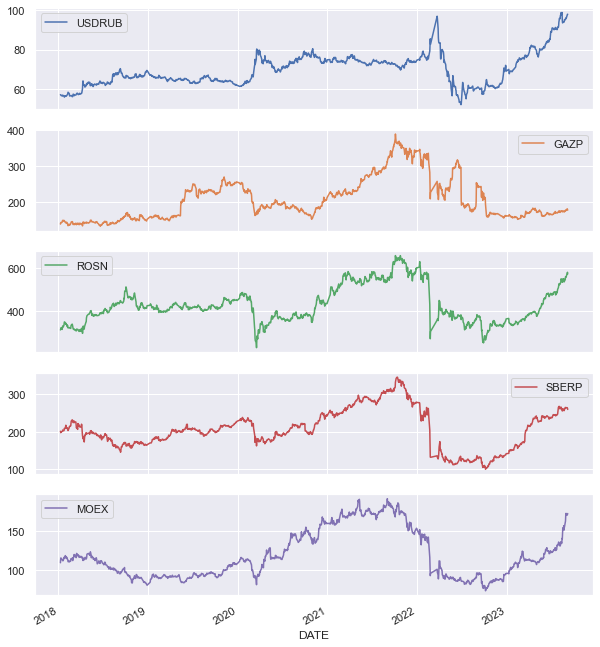

In [37]:
result3.plot(figsize=(10, 12), subplots=True);  

In [38]:
result3.diff().mean()

USDRUB    0.030884
GAZP      0.029171
ROSN      0.192992
SBERP     0.044152
MOEX      0.047453
dtype: float64

In [39]:
result3.pct_change().round(3).tail()

,USDRUB,GAZP,ROSN,SBERP,MOEX
DATE,,,,,
2023-08-31,-0.002,0.003,-0.001,0.002,0.015
2023-09-01,0.002,0.001,0.005,-0.001,-0.011
2023-09-05,0.018,0.024,0.027,0.000,-0.002
2023-09-06,0.003,-0.008,0.008,-0.006,0.007
2023-09-07,0.000,-0.012,-0.013,-0.012,0.004


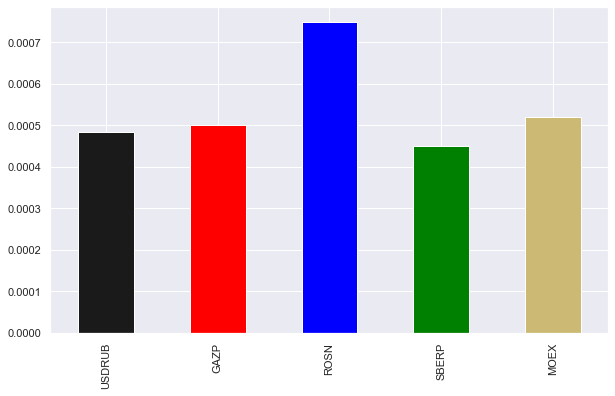

In [40]:
result3.pct_change().mean().plot(kind='bar', color=['k', 'red', 'blue', 'green', 'y'], figsize=(10, 6));

In [41]:
rets = np.log(result3 / result3.shift(1))  

In [42]:
rets.tail().round(3)

,USDRUB,GAZP,ROSN,SBERP,MOEX
DATE,,,,,
2023-08-31,-0.002,0.003,-0.001,0.002,0.015
2023-09-01,0.002,0.001,0.005,-0.001,-0.011
2023-09-05,0.018,0.024,0.027,0.000,-0.002
2023-09-06,0.003,-0.008,0.008,-0.006,0.007
2023-09-07,0.000,-0.013,-0.013,-0.012,0.004


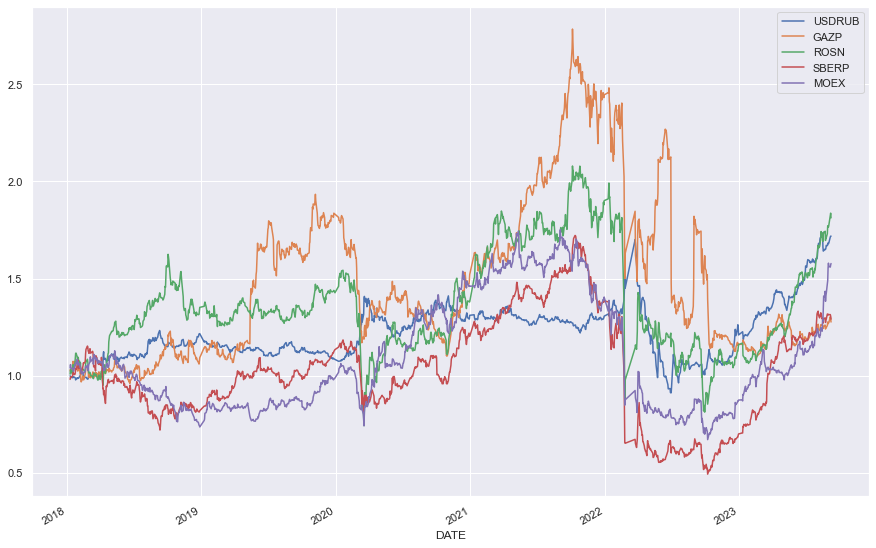

In [43]:
rets.cumsum().apply(np.exp).plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_03.png');

In [44]:
result3.resample('1w', label='right').last()

,USDRUB,GAZP,ROSN,SBERP,MOEX
DATE,,,,,
2018-01-14,56.5600,143.99,324.35,199.49,113.49
2018-01-21,56.5525,149.13,328.00,203.97,111.50
2018-01-28,56.0625,147.19,351.80,208.00,115.75
2018-02-04,56.3125,144.00,339.90,208.80,115.80
2018-02-11,58.2825,135.56,324.55,203.18,110.50
...,...,...,...,...,...
2023-08-13,98.8700,176.35,549.00,265.86,135.46
2023-08-20,93.7525,175.48,548.20,260.51,153.81
2023-08-27,95.3075,174.70,538.85,259.88,155.20


In [45]:
result3.resample('1m', label='right').last()

,USDRUB,GAZP,ROSN,SBERP,MOEX
DATE,,,,,
2018-01-31,56.3075,143.36,343.20,217.49,115.00
2018-02-28,56.1200,143.16,330.50,227.00,111.85
2018-03-31,57.3000,142.33,313.90,214.14,117.00
2018-04-30,62.2075,144.50,380.00,194.91,120.05
2018-05-31,62.1700,145.00,385.30,196.00,112.59
...,...,...,...,...,...
2023-05-31,81.0750,162.94,450.10,241.13,116.32
2023-06-30,89.2500,166.86,482.35,236.96,123.06
2023-07-31,91.3550,174.33,508.75,265.29,134.00


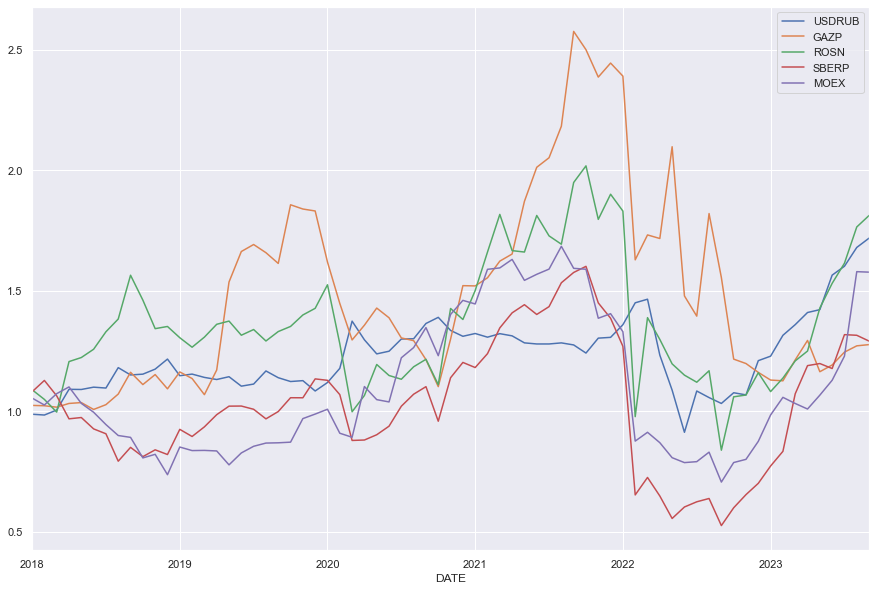

In [46]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
                          ).plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_04.png');

In [47]:
sym = 'SBERP'

In [48]:
data = pd.DataFrame(result3[sym]).dropna()

In [49]:
data.tail()

,SBERP
DATE,
2023-08-31,264.75
2023-09-01,264.61
2023-09-05,264.63
2023-09-06,262.94
2023-09-07,259.89


In [50]:
window = 20  
data['min'] = data[sym].rolling(window=window).min()  
data['mean'] = data[sym].rolling(window=window).mean()  
data['std'] = data[sym].rolling(window=window).std()  
data['median'] = data[sym].rolling(window=window).median()  
data['max'] = data[sym].rolling(window=window).max()  
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  
data.dropna()

,SBERP,min,mean,std,median,max,ewma
DATE,,,,,,,
2018-02-06,210.60,197.52,205.9460,5.494296,204.415,217.49,210.415307
2018-02-07,210.22,197.52,206.3920,5.459236,206.315,217.49,210.268827
2018-02-08,206.60,199.49,206.8460,5.044384,207.300,217.49,207.517207
2018-02-09,203.18,199.49,207.0160,4.847157,207.300,217.49,204.264302
2018-02-12,207.69,200.82,207.4260,4.512295,207.845,217.49,206.833575
...,...,...,...,...,...,...,...
2023-08-31,264.75,255.72,261.8520,3.132231,261.210,266.50,264.660932
2023-09-01,264.61,255.72,261.8805,3.155692,261.210,266.50,264.622733
2023-09-05,264.63,255.72,262.0505,3.209920,262.195,266.50,264.628183


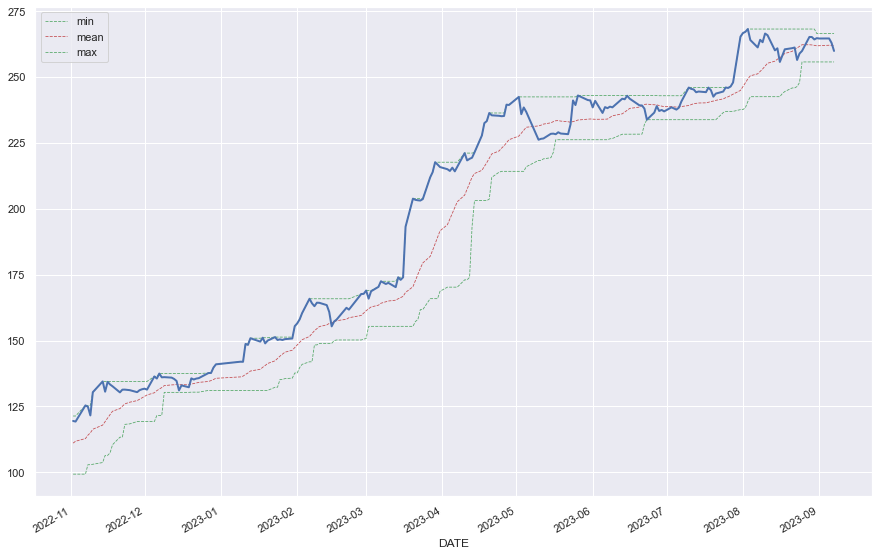

In [51]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(15, 10), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  
# plt.savefig('../../images/ch08/fts_05.png');

# A Technical Analysis Example

In [52]:
data['SMA1'] = data[sym].rolling(window=42).mean()  
data['SMA2'] = data[sym].rolling(window=252).mean()  
data[[sym, 'SMA1', 'SMA2']].tail()

,SBERP,SMA1,SMA2
DATE,,,
2023-08-31,264.75,254.731905,181.619881
2023-09-01,264.61,255.374048,182.197341
2023-09-05,264.63,255.999286,182.774722
2023-09-06,262.94,256.528810,183.339563
2023-09-07,259.89,256.859524,183.894881


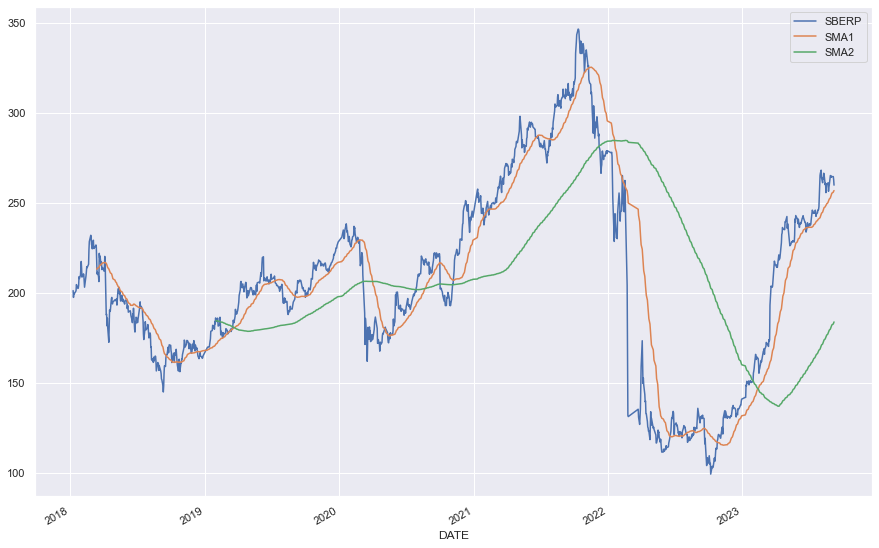

In [53]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_06.png');

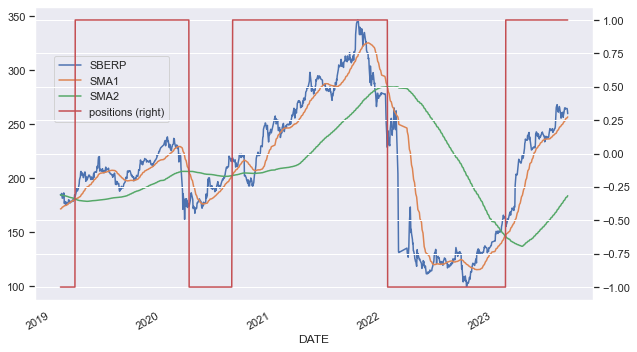

In [54]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],  
                             1,  
                             -1)  
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch08/fts_07.png');

In [55]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) 
d = data[[sym, 'SMA1', 'SMA2', 'Position']]
d

,SBERP,SMA1,SMA2,Position
DATE,,,,
2019-02-01,185.00,171.653095,184.555913,-1
2019-02-04,184.10,171.957857,184.487659,-1
2019-02-05,186.00,172.422143,184.441944,-1
2019-02-06,185.77,172.862143,184.386349,-1
2019-02-07,181.60,173.200238,184.315357,-1
...,...,...,...,...
2023-08-31,264.75,254.731905,181.619881,1
2023-09-01,264.61,255.374048,182.197341,1
2023-09-05,264.63,255.999286,182.774722,1


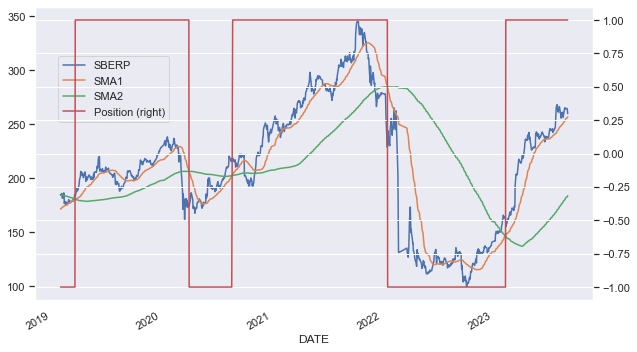

In [56]:
ax = d.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_02.png')

In [57]:
d['Returns'] = np.log(d[sym] / d[sym].shift(1)) 
d['Strategy'] = d['Position'].shift(1) * d['Returns']  
d.round(4)

,SBERP,SMA1,SMA2,Position,Returns,Strategy
DATE,,,,,,
2019-02-01,185.00,171.6531,184.5559,-1,NaN,NaN
2019-02-04,184.10,171.9579,184.4877,-1,-0.0049,0.0049
2019-02-05,186.00,172.4221,184.4419,-1,0.0103,-0.0103
2019-02-06,185.77,172.8621,184.3863,-1,-0.0012,0.0012
2019-02-07,181.60,173.2002,184.3154,-1,-0.0227,0.0227
...,...,...,...,...,...,...
2023-08-31,264.75,254.7319,181.6199,1,0.0019,0.0019
2023-09-01,264.61,255.3740,182.1973,1,-0.0005,-0.0005
2023-09-05,264.63,255.9993,182.7747,1,0.0001,0.0001


In [58]:
d.dropna(inplace=True)

In [59]:
np.exp(d[['Returns', 'Strategy']].sum())

Returns     1.404811
Strategy    1.990096
dtype: float64

In [60]:
d[['Returns', 'Strategy']].std() * 252 ** 0.5  

Returns     0.378283
Strategy    0.378179
dtype: float64

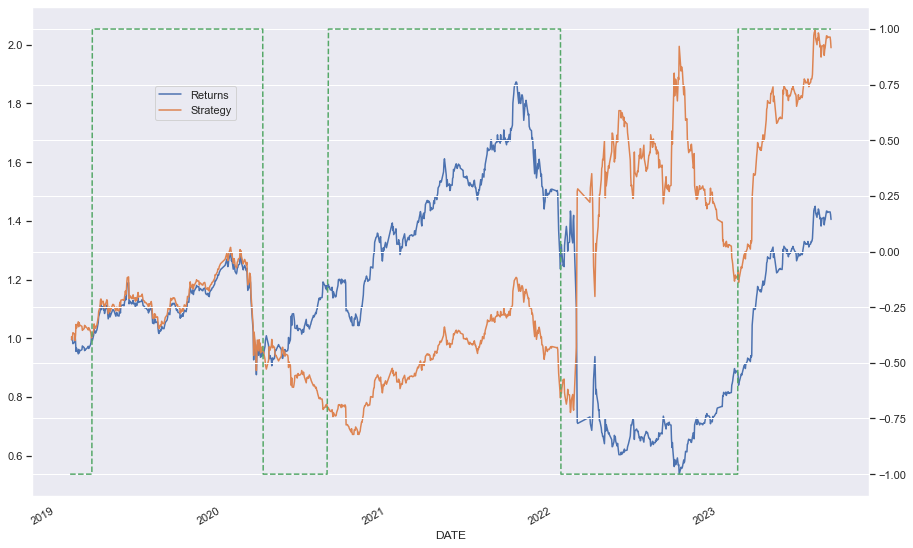

In [61]:
ax = d[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(15, 10))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');
plt.savefig('strat_plot_03.png');

# Regression Analysis

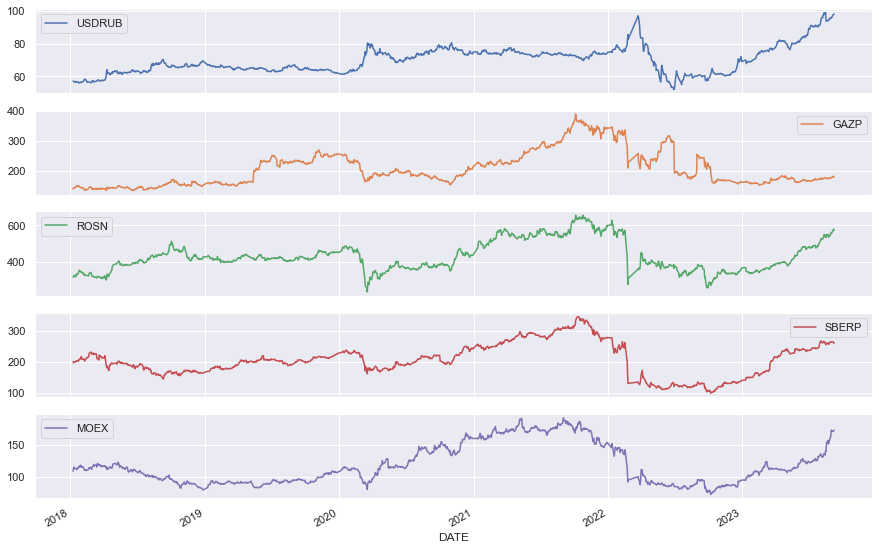

In [62]:
result3.plot(subplots=True, figsize=(15, 10));
# plt.savefig('../../images/ch08/fts_08.png');

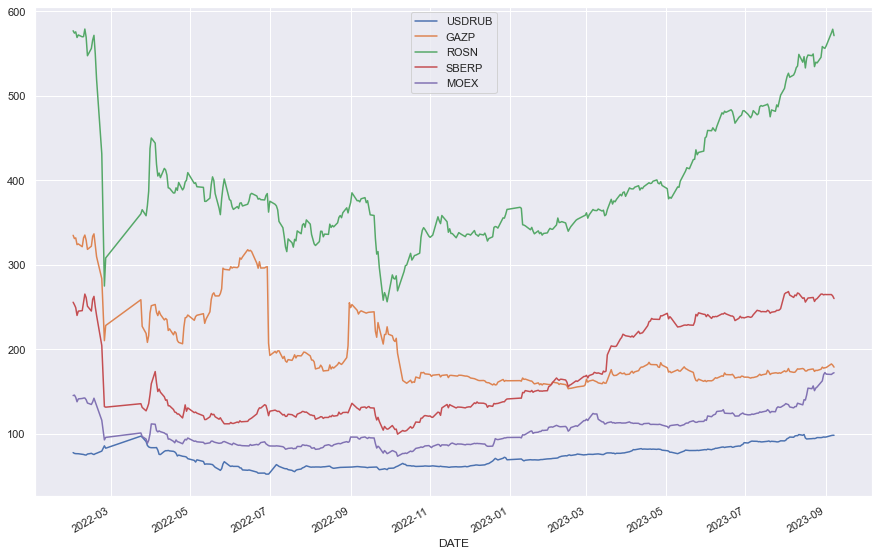

In [63]:
result3.loc['2022-01-31':].plot(figsize=(15, 10));  
# plt.savefig('../../images/ch08/fts_09.png');

In [64]:
rets = np.log(result3 / result3.shift(1)) 

In [65]:
rets.head()

,USDRUB,GAZP,ROSN,SBERP,MOEX
DATE,,,,,
2018-01-09,NaN,NaN,NaN,NaN,NaN
2018-01-10,-0.000833,0.024205,0.008375,-0.018956,0.039023
2018-01-11,-0.002504,0.007986,0.022560,0.011377,0.016616
2018-01-12,-0.004938,-0.004089,-0.002002,-0.001453,-0.015823
2018-01-16,-0.001814,0.008988,-0.021345,0.006645,-0.004592


In [66]:
rets.dropna(inplace=True)

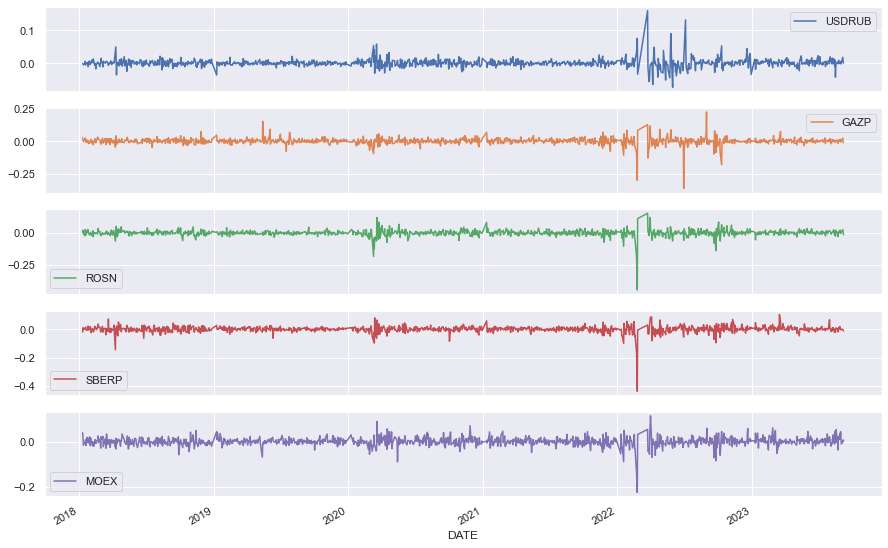

In [67]:
rets.plot(subplots=True, figsize=(15, 10));
# plt.savefig('../../images/ch08/fts_10.png');

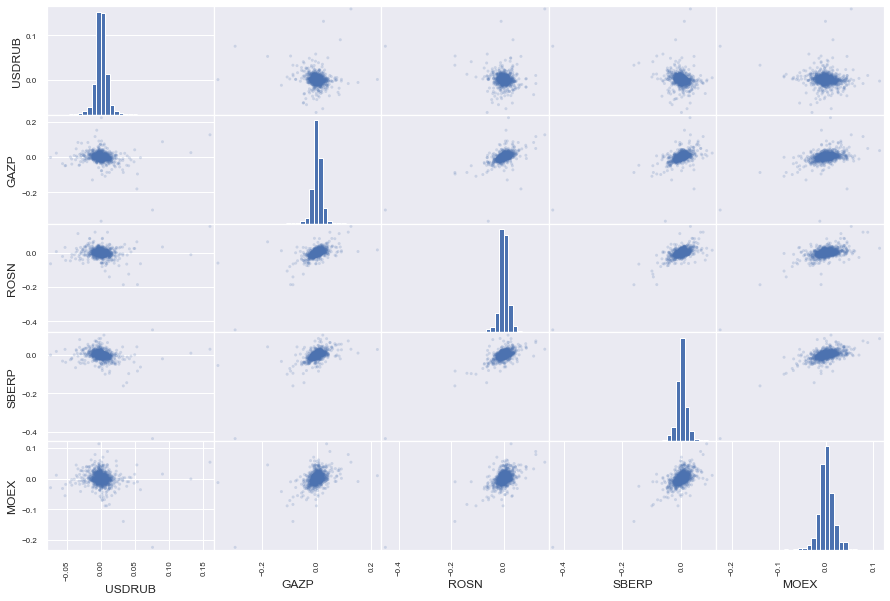

In [68]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(15, 10));
# plt.savefig('../../images/ch08/fts_11.png');

# Создаем файл xlsx / csv

In [69]:
# Создаем директорию и путь к файлу
prices_path = 'moex_prices'
for quotes in result3.columns:

        quotes_price_path = os.path.join(prices_path, f"{quotes.lower()}")
        if not os.path.exists(quotes_price_path ):
                os.makedirs(quotes_price_path)

        calculation_date = datetime.today().date().strftime(format="%d%m%Y")
        quotes_price_file_path = os.path.join(quotes_price_path, f'{quotes}_price_{calculation_date}.xlsx')
        
        with pd.ExcelWriter(quotes_price_file_path, engine='xlsxwriter') as writer:
                result3[f"{quotes}"].to_excel(writer, sheet_name='price')

                # Добавляем график с ценой
                plot_path = f'{quotes}_moex.png'
                plt.title('Цена', fontsize=16, fontweight='bold')
                plt.plot(result3[f"{quotes}"])
                plt.savefig(plot_path)
                plt.close()

                worksheet = writer.sheets['price']
                worksheet.insert_image('C2', plot_path)

#         print(f"{quotes} готов")

#         print("Удаляем ненужные файлы")
        for k in result3.columns:
            if os.path.exists(f"{k}_moex.png"):
                os.remove(f"{k}_moex.png")

In [70]:
# !pip install xlsxwriter

In [71]:
res3 = result3.copy()
res3['USDRUB_delta'] = res3['USDRUB'] - res3['USDRUB'].shift(1)
res3['GAZP_delta'] = res3['GAZP'] - res3['GAZP'].shift(1)
res3['ROSN_delta'] = res3['ROSN'] - res3['ROSN'].shift(1)
res3['SBERP_delta'] = res3['SBERP'] - res3['SBERP'].shift(1)
res3['MOEX_delta'] = res3['MOEX'] - res3['MOEX'].shift(1)
res3.dropna(inplace = True) 
res3 = res3[['USDRUB', 'USDRUB_delta','GAZP', 'GAZP_delta', 'ROSN', 'ROSN_delta', 'SBERP', 'SBERP_delta', 'MOEX', 'MOEX_delta']]
print(res3)

             USDRUB  USDRUB_delta    GAZP  GAZP_delta    ROSN  ROSN_delta  \
DATE                                                                        
2018-01-10  56.9825       -0.0475  143.43        3.43  317.75        2.65   
2018-01-11  56.8400       -0.1425  144.58        1.15  325.00        7.25   
2018-01-12  56.5600       -0.2800  143.99       -0.59  324.35       -0.65   
2018-01-16  56.4575       -0.1025  145.29        1.30  317.50       -6.85   
2018-01-17  56.7800        0.3225  148.70        3.41  326.50        9.00   
...             ...           ...     ...         ...     ...         ...   
2023-08-31  95.8100       -0.2050  177.99        0.52  556.15       -0.75   
2023-09-01  96.0000        0.1900  178.22        0.23  559.15        3.00   
2023-09-05  97.7400        1.7400  182.48        4.26  574.40       15.25   
2023-09-06  97.9925        0.2525  180.96       -1.52  578.80        4.40   
2023-09-07  98.0125        0.0200  178.71       -2.25  571.20       -7.60   

In [72]:
res = result10.copy()
res = res.reset_index()

In [73]:
res.to_csv('tablo.csv', index = False)

# Модуль PySpark

In [74]:
# os.system('hdfs dfs -put /home/std03/tablo.csv /user/std03')

In [75]:
# spark.read.csv('hdfs:///user/std03/tablo.csv', header = True).show()

In [76]:
# spark.sql('''CREATE TABLE IF NOT exists ivanov.logs (status varchar(32), times Timestamp)''').show(truncate=False)

In [77]:
# from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, DateType
# employeesSchema = StructType([
#     StructField("DATE", StringType()),
#     StructField("GAZP", FloatType()),
#     StructField("ROSN", FloatType()),
#     StructField("SBERP", FloatType()),
#     StructField("MOEX", FloatType()),
#     ])

In [78]:
# dfram = spark.read.csv('hdfs:///user/std03/tablo.csv', header = True, schema = employeesSchema)

In [79]:
# df_fram = dfram.write.format('parquet').mode('overwrite').saveAsTable('ivanov.tablo_p')

In [80]:
# spark.table('ivanov.tablo_p').show(truncate=False)

In [81]:
# spark.sql('''INSERT INTO ivanov.logs 
#              VALUES ("создана таблица parquet", current_timestamp())''').show(truncate=False)

In [82]:
# spark.sql('''Drop table ivanov.logs ''').show(truncate=False)

In [83]:
# spark.table('ivanov.logs').show(truncate=False)

In [84]:
# spark.table('ivanov.tablo_p').groupBy("DATE").agg(sqlf.max("SBERP").alias("SBERP_max")).show(truncate=False) 

In [85]:
# spark.sql('''select DATE, max(SBERP) as SBERP_max
#                 from ivanov.tablo_p
#                 group by DATE''').show(truncate=False)

In [86]:
# spark.sql('''INSERT INTO ivanov.logs 
#              VALUES ("найдено max значение SBERP", current_timestamp())''').show(truncate=False)

In [87]:
result = pd.read_csv('tablo.csv')
print(result)

                      DATE    GAZP    ROSN   SBERP    MOEX
0      2018-01-03 11:00:00  131.40  293.40  192.33  109.50
1      2018-01-03 12:00:00  131.21  293.65  193.31  109.16
2      2018-01-03 13:00:00  131.46  294.40  193.85  109.30
3      2018-01-03 14:00:00  131.32  295.10  194.69  109.50
4      2018-01-03 15:00:00  131.01  294.85  195.88  109.16
...                    ...     ...     ...     ...     ...
16291  2023-09-07 12:00:00  180.57  581.95  263.31  174.46
16292  2023-09-07 13:00:00  180.45  581.80  263.05  173.34
16293  2023-09-07 14:00:00  178.62  573.10  261.00  170.98
16294  2023-09-07 15:00:00  178.85  572.65  260.02  170.98
16295  2023-09-07 16:00:00  178.71  571.20  259.89  172.03

[16296 rows x 5 columns]


In [88]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16296 entries, 0 to 16295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16296 non-null  object 
 1   GAZP    16296 non-null  float64
 2   ROSN    16296 non-null  float64
 3   SBERP   16296 non-null  float64
 4   MOEX    16296 non-null  float64
dtypes: float64(4), object(1)
memory usage: 636.7+ KB


# SQL

In [89]:
import sqlite3

con = sqlite3.connect(':memory:')

result.to_sql('tablo', con, index=False, if_exists='replace')

16296

In [90]:
pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-1 months')) and strftime(date('now'))
    
    ''',
    con,
)

,DATE,GAZP,ROSN,SBERP,MOEX
0,2023-08-07 11:00:00,174.45,529.55,265.18,131.78
1,2023-08-07 12:00:00,175.01,538.60,266.70,132.01
2,2023-08-07 13:00:00,174.16,534.15,265.70,131.55
3,2023-08-07 14:00:00,174.67,536.35,266.03,131.98
4,2023-08-07 15:00:00,174.11,536.65,265.51,132.12
...,...,...,...,...,...
316,2023-09-06 19:00:00,181.32,578.05,263.12,171.01
317,2023-09-06 20:00:00,181.79,580.55,263.50,171.59
318,2023-09-06 21:00:00,181.13,580.10,263.85,171.93
319,2023-09-06 22:00:00,180.84,579.65,263.63,171.58


In [91]:
# три года
period1 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-3 years')) and strftime(date('now'))
    ''',
    con,
)
period1.set_index('DATE', inplace=True)
period1

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2020-09-07 11:00:00,179.24,370.80,214.83,135.44
2020-09-07 12:00:00,178.96,369.85,215.51,135.29
2020-09-07 13:00:00,177.13,367.80,213.99,134.93
2020-09-07 14:00:00,176.83,368.55,214.14,135.71
2020-09-07 15:00:00,176.37,368.65,213.71,136.25
...,...,...,...,...
2023-09-06 19:00:00,181.32,578.05,263.12,171.01
2023-09-06 20:00:00,181.79,580.55,263.50,171.59
2023-09-06 21:00:00,181.13,580.10,263.85,171.93


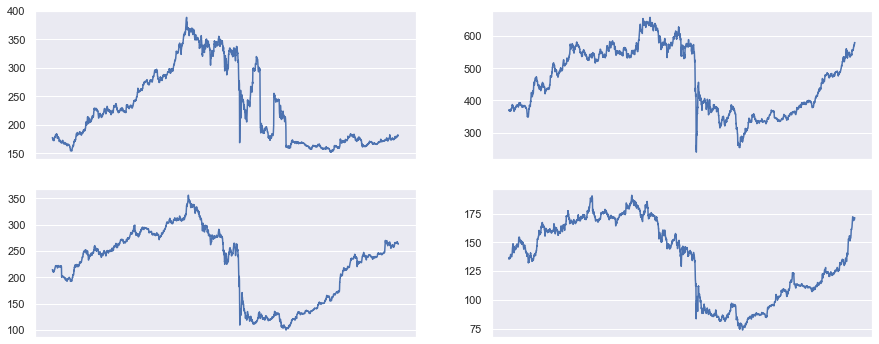

In [92]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(period1['GAZP'].rolling(5).mean())
ax2.plot(period1['ROSN'].rolling(5).mean())
ax3.plot(period1['SBERP'].rolling(5).mean())
ax4.plot(period1['MOEX'].rolling(5).mean())
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])
# ax1.set_yticks([])
fig.set_size_inches(15,6)

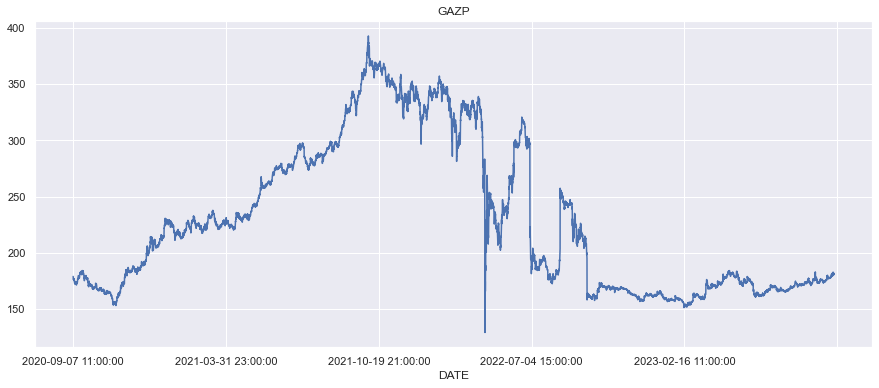

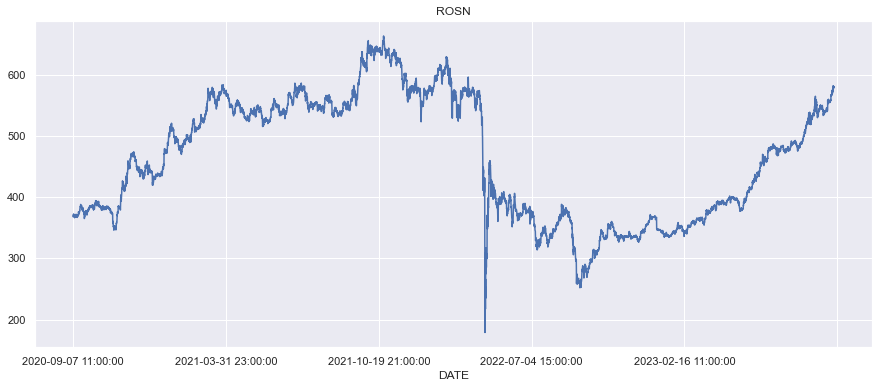

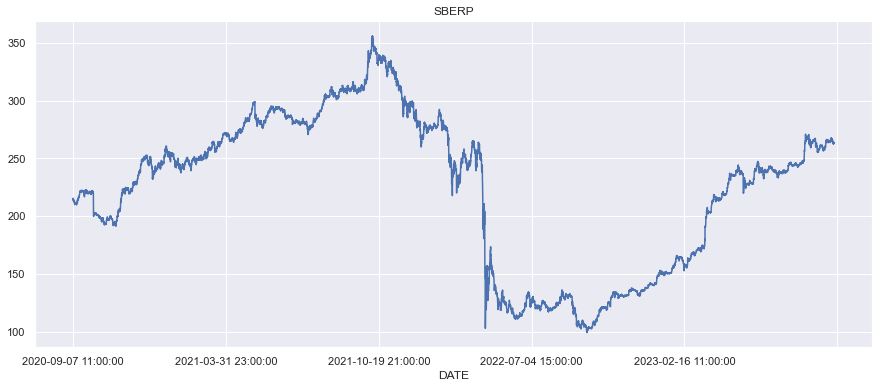

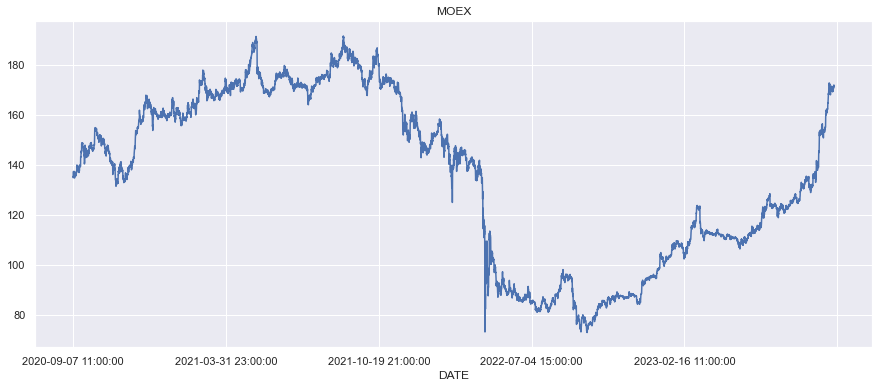

In [93]:
for i in period1.columns:
    period1[i].plot(figsize=(15,6))
    plt.title(i)
    plt.show()

In [94]:
# год
period2 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-1 years')) and strftime(date('now'))
    ''',
    con,
)
period2.set_index('DATE', inplace=True)
period2

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2022-09-07 11:00:00,245.27,372.80,130.48,95.08
2022-09-07 12:00:00,244.46,372.50,129.25,94.74
2022-09-07 13:00:00,243.98,373.10,128.94,94.90
2022-09-07 14:00:00,244.72,372.90,129.54,95.34
2022-09-07 15:00:00,244.50,378.75,129.33,94.82
...,...,...,...,...
2023-09-06 19:00:00,181.32,578.05,263.12,171.01
2023-09-06 20:00:00,181.79,580.55,263.50,171.59
2023-09-06 21:00:00,181.13,580.10,263.85,171.93


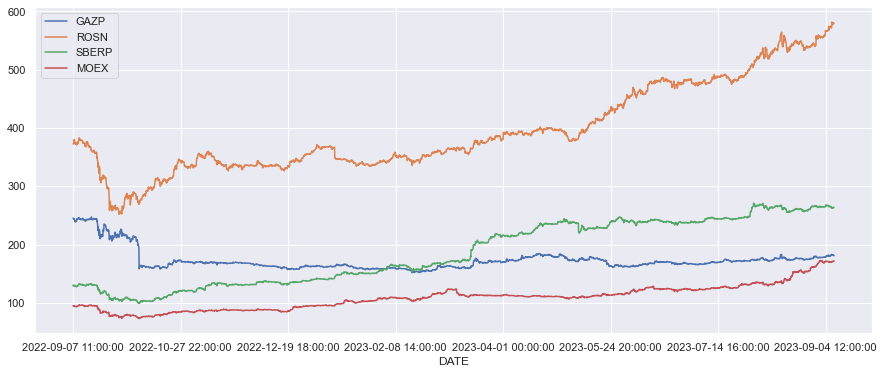

In [95]:
period2.plot(figsize=(15,6))
plt.show()

In [96]:
# месяц
period3 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-1 months')) and strftime(date('now'))
    ''',
    con,
)
period3.set_index('DATE', inplace=True)
period3

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2023-08-07 11:00:00,174.45,529.55,265.18,131.78
2023-08-07 12:00:00,175.01,538.60,266.70,132.01
2023-08-07 13:00:00,174.16,534.15,265.70,131.55
2023-08-07 14:00:00,174.67,536.35,266.03,131.98
2023-08-07 15:00:00,174.11,536.65,265.51,132.12
...,...,...,...,...
2023-09-06 19:00:00,181.32,578.05,263.12,171.01
2023-09-06 20:00:00,181.79,580.55,263.50,171.59
2023-09-06 21:00:00,181.13,580.10,263.85,171.93


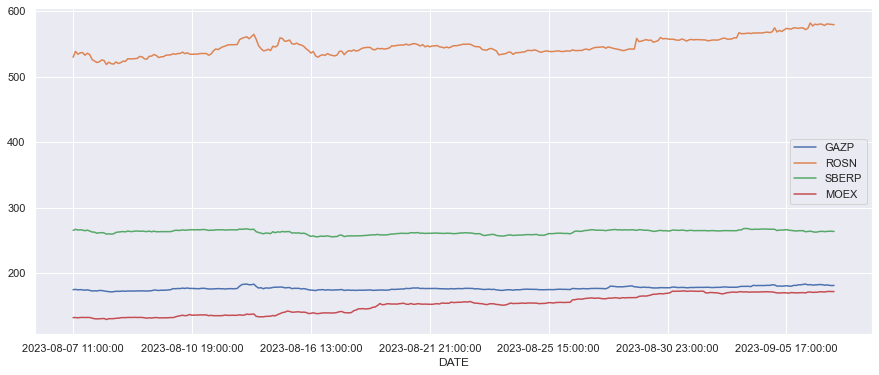

In [97]:
period3.plot(figsize=(15,6))
plt.show()

In [98]:
# неделя
period4 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where date BETWEEN strftime(date('now','-7 day')) and strftime(date('now'))
    ''',
    con,
)
period4.set_index('DATE', inplace=True)
period4

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2023-08-31 00:00:00,177.47,556.90,264.25,169.74
2023-08-31 11:00:00,178.50,557.30,265.59,172.18
2023-08-31 12:00:00,178.44,556.55,265.51,172.01
2023-08-31 13:00:00,177.83,555.65,265.27,172.21
2023-08-31 14:00:00,177.81,555.70,265.11,172.20
...,...,...,...,...
2023-09-06 19:00:00,181.32,578.05,263.12,171.01
2023-09-06 20:00:00,181.79,580.55,263.50,171.59
2023-09-06 21:00:00,181.13,580.10,263.85,171.93


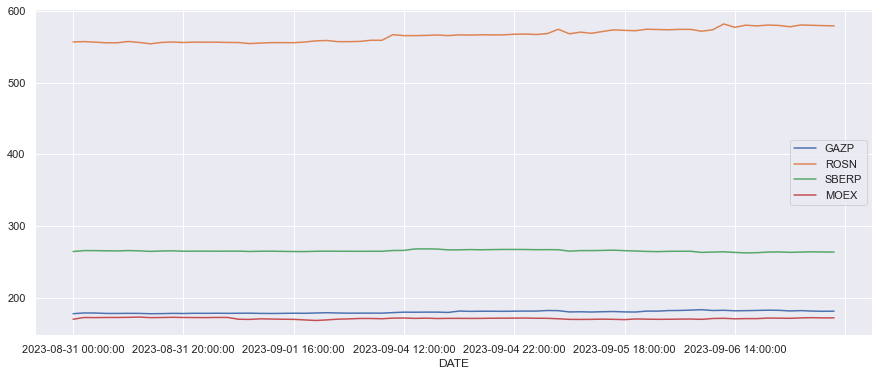

In [99]:
period4.plot(figsize=(15,6))
plt.show()

In [100]:
# # день
# period5 = pd.read_sql(
#     '''
#     SELECT * FROM tablo
#     where date = strftime(date('now'))
#     ''',
#     con,
# )
# period5.set_index('DATE', inplace=True)
# period5

In [101]:
# день
period5 = pd.read_sql(
    '''
    SELECT * FROM tablo
    where SUBSTRING(cast(date AS VARCHAR), 0 , 11) = strftime(date('now'))
    ''',
    con,
)
period5.set_index('DATE', inplace=True)
period5

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2023-09-07 00:00:00,180.96,578.80,262.94,171.30
2023-09-07 11:00:00,180.94,581.00,263.71,174.57
2023-09-07 12:00:00,180.57,581.95,263.31,174.46
2023-09-07 13:00:00,180.45,581.80,263.05,173.34
2023-09-07 14:00:00,178.62,573.10,261.00,170.98
2023-09-07 15:00:00,178.85,572.65,260.02,170.98
2023-09-07 16:00:00,178.71,571.20,259.89,172.03


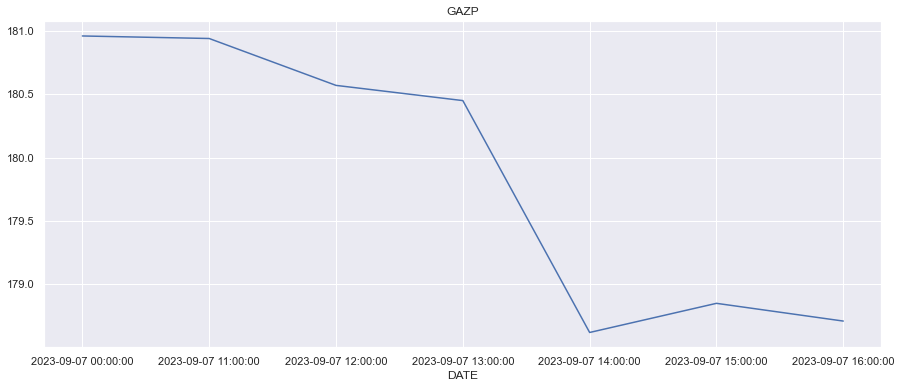

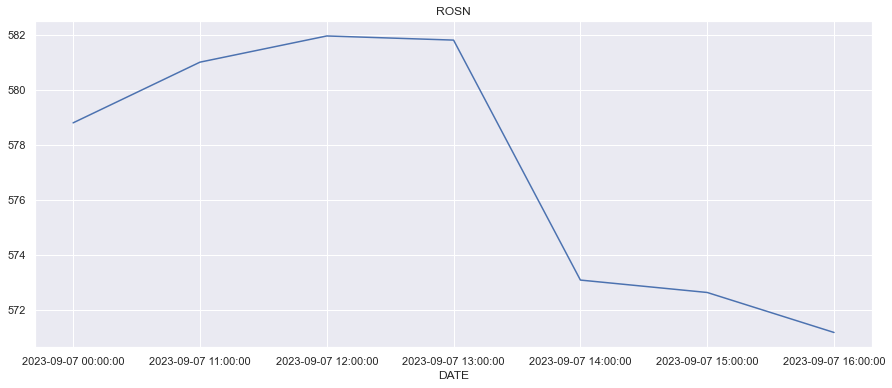

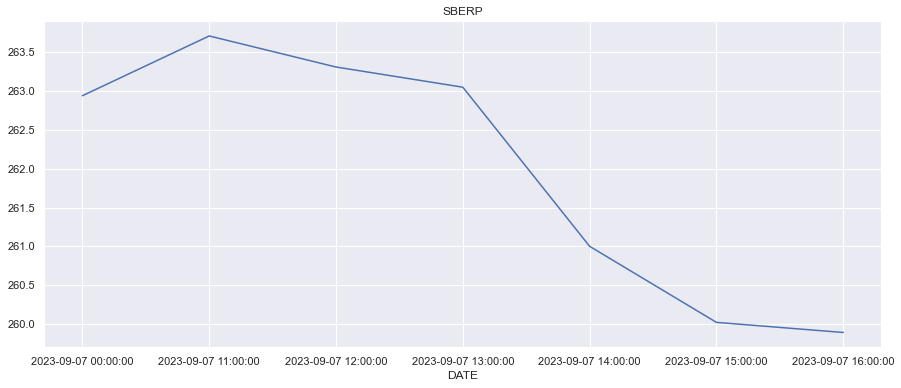

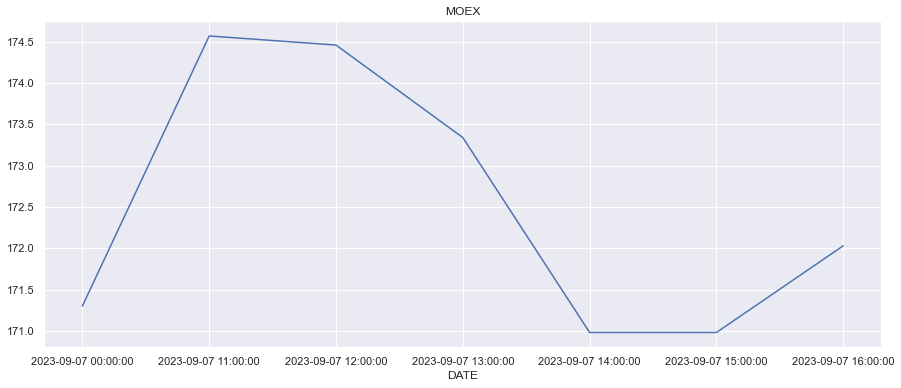

In [102]:
for i in period5.columns:
    period5[i].plot(figsize=(15,6))
    plt.title(i)
    plt.show()

In [103]:
# Создаем директорию и путь к файлу
prices_path = 'moex_prices_day'
for quotes in period5.columns:

        quotes_price_path = os.path.join(prices_path, f"{quotes.lower()}")
        if not os.path.exists(quotes_price_path ):
                os.makedirs(quotes_price_path)

        calculation_date = datetime.today().date().strftime(format="%d%m%Y")
        quotes_price_file_path = os.path.join(quotes_price_path, f'{quotes}_price_{calculation_date}.xlsx')
        
        with pd.ExcelWriter(quotes_price_file_path, engine='xlsxwriter') as writer:
                period5[f"{quotes}"].to_excel(writer, sheet_name='price')

                # Добавляем график с ценой
                plot_path = f'{quotes}_moex.png'
                plt.title('Цена', fontsize=16, fontweight='bold')
                plt.plot(period5[f"{quotes}"])
                plt.savefig(plot_path)
                plt.close()

                worksheet = writer.sheets['price']
                worksheet.insert_image('C2', plot_path)

#         print(f"{quotes} готов")

#         print("Удаляем ненужные файлы")
        for k in period5.columns:
            if os.path.exists(f"{k}_moex.png"):
                os.remove(f"{k}_moex.png")

In [104]:
result.set_index('DATE', inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16296 entries, 2018-01-03 11:00:00 to 2023-09-07 16:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAZP    16296 non-null  float64
 1   ROSN    16296 non-null  float64
 2   SBERP   16296 non-null  float64
 3   MOEX    16296 non-null  float64
dtypes: float64(4)
memory usage: 636.6+ KB


# Ковариация и корреляция

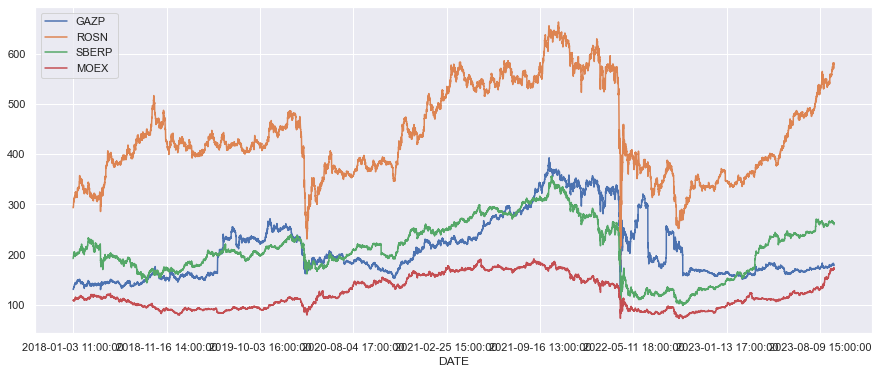

In [105]:
result.plot(figsize=(15,6))
plt.show()

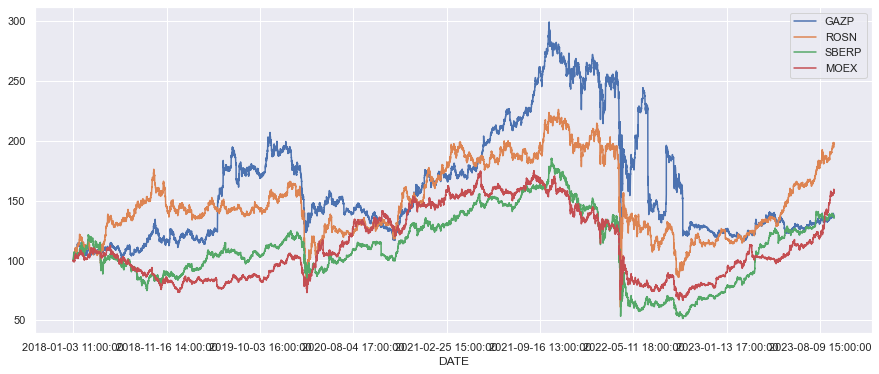

In [106]:
(result / result.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

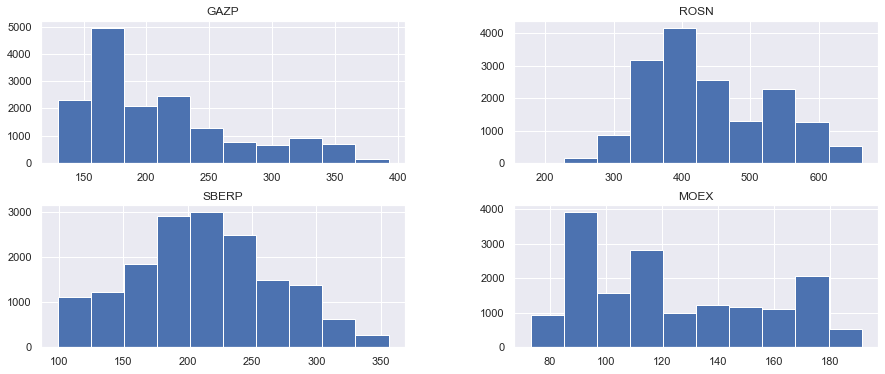

In [107]:
result.hist(figsize=(15,6))
plt.show()

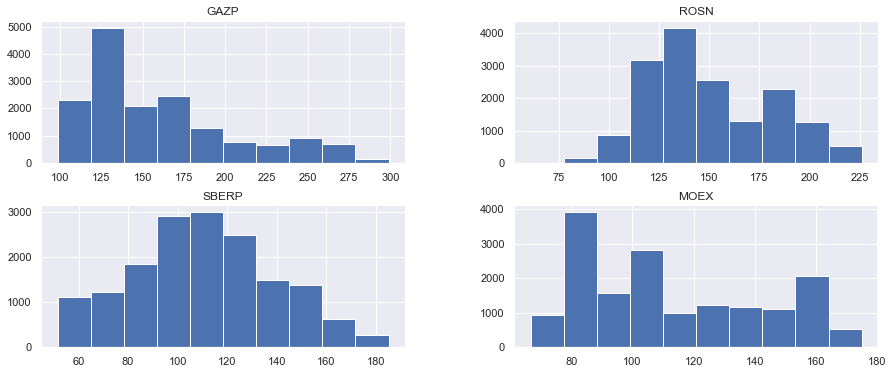

In [108]:
(result / result.iloc[0] * 100).hist(figsize = (15, 6));

In [109]:
#  создаем таблицу относительныхдоходностей
returns = (result / result.shift(1)) - 1  # 0+/-
returns.tail()

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2023-09-07 12:00:00,-0.002045,0.001635,-0.001517,-0.000630
2023-09-07 13:00:00,-0.000665,-0.000258,-0.000987,-0.006420
2023-09-07 14:00:00,-0.010141,-0.014954,-0.007793,-0.013615
2023-09-07 15:00:00,0.001288,-0.000785,-0.003755,0.000000
2023-09-07 16:00:00,-0.000783,-0.002532,-0.000500,0.006141


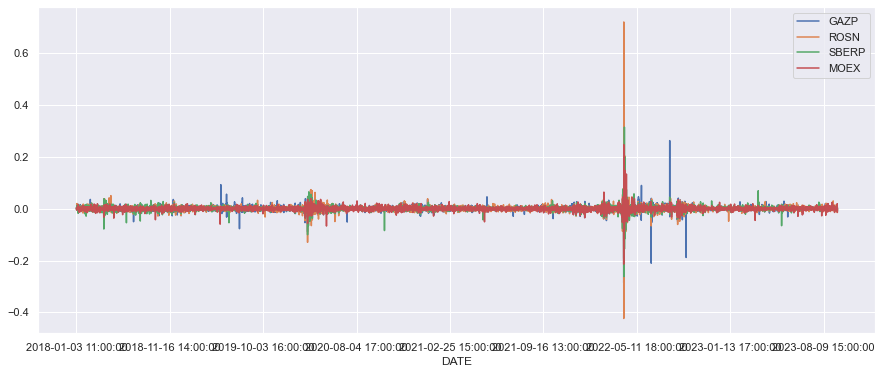

In [110]:
returns.plot(figsize = (15, 6));

In [111]:
result.dropna(inplace = True)

In [112]:
# Годовые доходности
annual_returns = returns.mean() * result.shape[0] # mean in period
annual_returns

GAZP     0.895099
ROSN     1.405329
SBERP    0.746562
MOEX     0.775903
dtype: float64

In [113]:
# Строим матрицу ковариаций
cov_matrix_a = returns.cov() * result.shape[0]
cov_matrix_a

,GAZP,ROSN,SBERP,MOEX
GAZP,1.189998,0.980053,0.478267,0.496132
ROSN,0.980053,1.567332,0.436716,0.585856
SBERP,0.478267,0.436716,0.887025,0.378638
MOEX,0.496132,0.585856,0.378638,0.653084


In [114]:
# Логарифмируем для нормализации распределений и выравнпивания дисперсий
cov_matrix_LOG = np.log(result / result.shift(1)).cov() * result.shape[0]
cov_matrix_LOG

,GAZP,ROSN,SBERP,MOEX
GAZP,1.177379,0.922544,0.483338,0.485202
ROSN,0.922544,1.466568,0.430840,0.542077
SBERP,0.483338,0.430840,0.896278,0.378984
MOEX,0.485202,0.542077,0.378984,0.647162


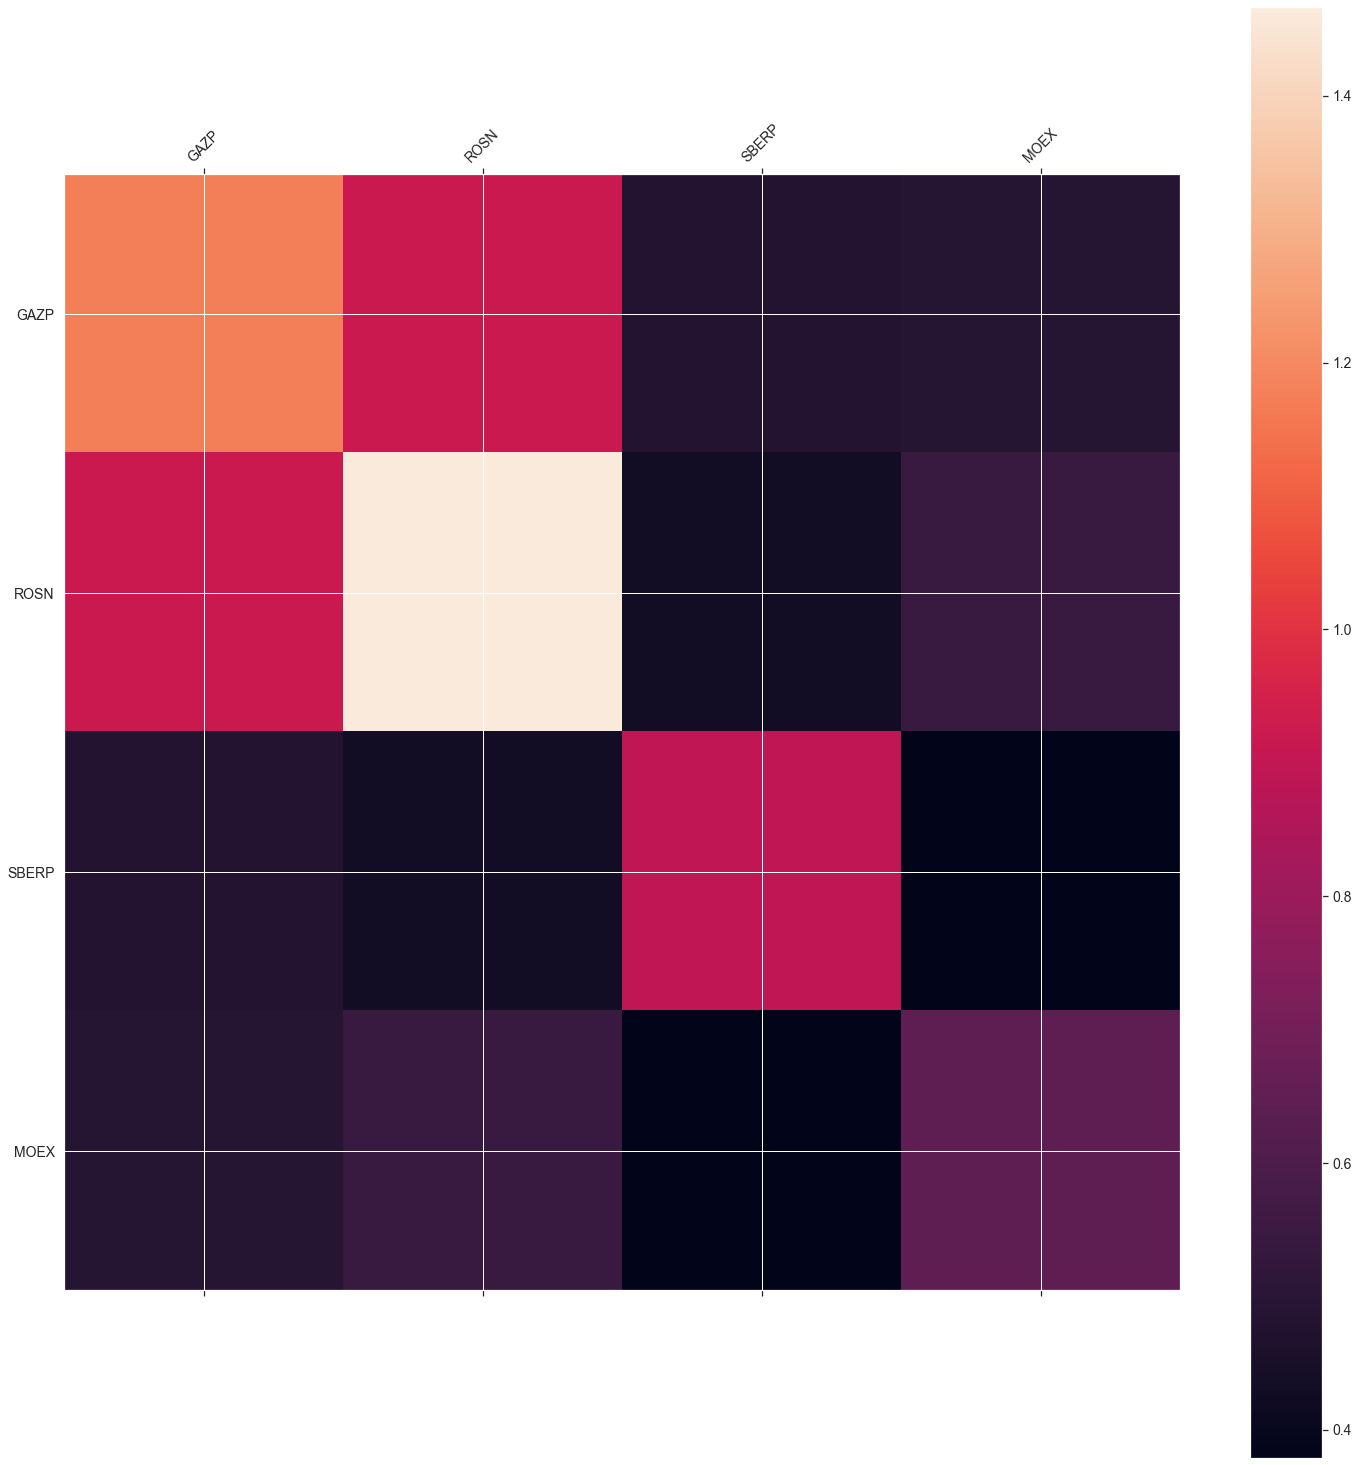

In [115]:
plt.figure(figsize=(25, 26))
plt.matshow(cov_matrix_LOG, fignum=1) #annot=True
plt.xticks(range(cov_matrix_LOG.shape[1]), cov_matrix_LOG.columns, fontsize=14, rotation=45)
plt.yticks(range(cov_matrix_LOG.shape[1]), cov_matrix_LOG.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

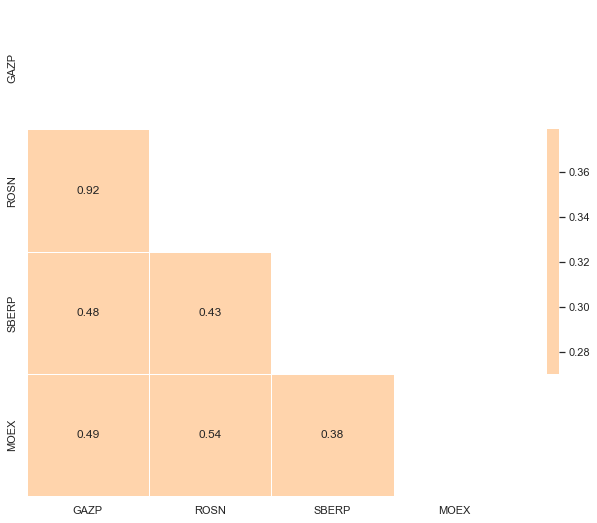

In [116]:
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_matrix_LOG, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,);

Обратите внимание, как доходности акций из разных отраслей ковариирую между собой и как меняется ковариация в разные исторические периоды

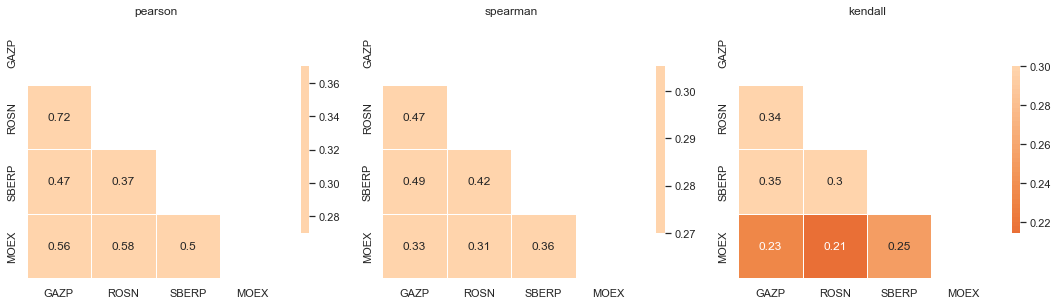

In [117]:
# А что показывает корреляция? 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_a, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

for corr_type, ax in zip(('pearson', "spearman", 'kendall'),(ax1, ax2, ax3)):

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(returns.corr(method=corr_type), mask=mask,  vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax)
    ax.set_title(corr_type)

plt.tight_layout()
plt.show();

In [118]:
tickers = ["SBERP", "MOEX","GAZP", "ROSN"]

In [119]:
# Корреляции с помощью numpy
## For Dimensionality Reduction
correlations = np.abs([np.corrcoef(result["SBERP"],result[col_name])[0,1] for col_name in tickers[1:]])
print (list(zip(tickers[1:],correlations)))

[('MOEX', 0.867673177220824), ('GAZP', 0.6068418926706947), ('ROSN', 0.8421765101913188)]


In [120]:
# Не сильно связаны!
correlations[correlations < .8]

array([0.60684189])

In [121]:
returns.isna().count()

GAZP     16296
ROSN     16296
SBERP    16296
MOEX     16296
dtype: int64

In [122]:
returns.dropna(inplace = True) 
returns

,GAZP,ROSN,SBERP,MOEX
DATE,,,,
2018-01-03 12:00:00,-0.001446,0.000852,0.005095,-0.003105
2018-01-03 13:00:00,0.001905,0.002554,0.002793,0.001283
2018-01-03 14:00:00,-0.001065,0.002378,0.004333,0.001830
2018-01-03 15:00:00,-0.002361,-0.000847,0.006112,-0.003105
2018-01-03 16:00:00,-0.000153,0.000170,0.005207,-0.005130
...,...,...,...,...
2023-09-07 12:00:00,-0.002045,0.001635,-0.001517,-0.000630
2023-09-07 13:00:00,-0.000665,-0.000258,-0.000987,-0.006420
2023-09-07 14:00:00,-0.010141,-0.014954,-0.007793,-0.013615


In [123]:
# Выборка из 2х акций с разными типами корреляций

sem = pd.DataFrame(columns = ('pearson', "spearman", 'kendall'))
for corr_type in sem.columns:
#     print (corr_type)
    sem[corr_type] = [returns['SBERP'].corr(other=returns["MOEX"], method=corr_type)] #.sem()
sem

,pearson,spearman,kendall
0,0.497475,0.355975,0.251637


In [124]:
# простой способ
[returns['SBERP'].corr(other=returns["MOEX"])]

[0.49747538886858683]

In [125]:
# доверительный интервал
returns['SBERP'].sem() 

5.779633940827637e-05

In [126]:
# средняя доходность
returns['SBERP'].mean() 

4.5812593079419114e-05

<AxesSubplot:>

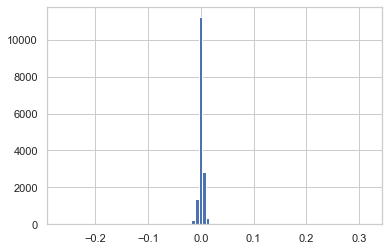

In [127]:
# доходность GOOG на графике
returns['SBERP'].hist(bins=85)

In [128]:
# os.system('hdfs dfs -rm tablo.csv')

In [129]:
# spark.table('ivanov.logs').repartition(1).write.mode('overwrite').csv("/user/std03/logs")

In [130]:
# os.system('hdfs dfs -get /user/std03/logs /home/std03')

In [131]:
# sc.stop()

# News RBC

In [132]:
import requests as rq
from bs4 import BeautifulSoup as bs
import datetime as dt
import json
import re
import os
import pandas as pd

In [133]:
RBC_FINANCE_URL = 'https://rbc.ru/v10/ajax/get-news-by-filters/?category=finances&limit=20&offset='
CLEANR = re.compile('<.*?>') 

In [134]:
def parse_rbc_news(days=1):
    offset = 0
    ress = []
    while (True):
        response = rq.get(RBC_FINANCE_URL + str(offset))
        offset += 20
        if (response.status_code == 200):
            news_urls = re.findall('https://www.rbc.ru/finances/\d+/\d+/\d+/\w+', response.text)
            for url in news_urls:
                try:
                    res = {}
                    res['url']= url
                    news = rq.get(url).text
                    soup = bs(news, 'html.parser')
                    res['site'] = 'rbc_finances'
                    res['title'] = soup.body.find(class_="article__header__title-in js-slide-title").text.replace("\xa0", " ").replace("\t", " ").strip()
                    
                    def cleanhtml(raw_html):
                        return re.sub(CLEANR, '', raw_html)

                    raw = soup.body.find('div', class_="article__text article__text_free").find_all('p')
                    res['text'] = ''
                    for i in raw:
                        if (str(i).find('span') == -1):
                            res['text'] += cleanhtml(str(i))
                    try:
                        res['description'] = soup.body.find(class_="article__text__overview").text.replace("\xa0", " ").replace("\t", " ")
                    except:
                        if (len(res['text']) > 100):
                            res['description'] = res['text'][:100] + '...'
                        else:
                            res['description'] = res['text']
                    date_raw =re.findall('\d{4}-\d+-\d+T\d+:\d+:\d+' ,str(soup.body.find(class_="article__header__date")))[0]
                    date, time = date_raw.split('T')
                    date = date.split('-')
                    time = time.split(':')
                    res['timestamp'] = dt.datetime(int(date[0]), int(date[1]), int(date[2]), int(time[0]), int(time[1]), int(time[2])).timestamp()
                    if (days * 86400 + res['timestamp'] < dt.datetime.now().timestamp()):
                        return ress
                    ress.append(res)
                except Exception as e:
                    print(e, url)
        else:
            return ress

In [135]:
res = parse_rbc_news(7)

In [136]:
with open('rbc_finances_news.json', 'w+', encoding='utf8') as outfile:
        json.dump(res, outfile)

In [137]:
df1 = pd.json_normalize(res)

In [138]:
df1['text'] = df1['text'].replace(r'\s+|\\n', ' ', regex=True)
df1['description'] = df1['description'].replace(r'\s+|\\n', ' ', regex=True)
df1[df1['text'].str.contains("Роснефт|Газпром|Сбербанк")]

,url,site,title,text,description,timestamp
4,https://www.rbc.ru/finances/06/09/2023/64f8528...,rbc_finances,Швецов предложил ужесточить ответственность за...,Для защиты интересов миноритарных акционеров н...,Для защиты миноритарных акционеров российских...,1.693999e+09
6,https://www.rbc.ru/finances/06/09/2023/64f81d4...,rbc_finances,ЦБ ускорит продажи валюты почти в 10 раз,"Центробанк объявил, что с 14 по 22 сентября пр...",Центробанк для погашения валютного выпуска ев...,1.693982e+09
16,https://www.rbc.ru/finances/01/09/2023/64f1dc4...,rbc_finances,ЦБ раскритиковал нестабильную выплату дивиденд...,Текущая дивидендная политика российских компан...,Дивидендная политика российских эмитентов сли...,1.693576e+09


# Формирование отчета

In [139]:
# 1. Set up multiple variables to store the titles, text within the report
# Настройте несколько переменных для хранения заголовков и текста в отчете.
page_title_text='My report'
title_text = 'Daily MOEX Sber prices report'
text = 'Hello, welcome to your report!'
prices_text = 'Historical prices of MOEX Sber'
stats_text = 'Historical prices summary statistics'
stats_text1 = 'News RBC Sber'


# 2. Combine them together using a long f-string
# Соедините их вместе, используя длинную f-строку.
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src='strat_plot_03.png' width="700">
            <h2>{prices_text}</h2>
            {d.tail(3).to_html()}
            <h2>{stats_text}</h2>
            {data.tail().to_html()}
            <h2>{stats_text1}</h2>
            {df1[df1['text'].str.contains("Сбербанк")].to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
# Запишите строку html как файл HTML.
with open('html_report.html', 'w', encoding="utf-8") as f:
    f.write(html)

In [140]:
# from weasyprint import HTML, CSS
# css = CSS(string='''
#     @page {size: A4; margin: 1cm;} 
#     th, td {border: 1px solid black;}
#     ''')
# HTML('html_report.html').write_pdf('weasyprint_pdf_report.pdf', stylesheets=[css])

In [141]:
def output_df_to_pdf(pdf, df):
    # A cell is a rectangular area, possibly framed, which contains some text
    # Set the width and height of cell
    table_cell_width = 25
    table_cell_height = 6
    # Select a font as Arial, bold, 8
    pdf.set_font('Arial', 'B', 8)
    
    # Loop over to print column names
    cols = df.columns
    for col in cols:
        pdf.cell(table_cell_width, table_cell_height, col, align='C', border=1)
    # Line break
    pdf.ln(table_cell_height)
    # Select a font as Arial, regular, 10
    pdf.set_font('Arial', '', 10)
    # Loop over to print each data in the table
    for row in df.itertuples():
        for col in cols:
            value = str(getattr(row, col))
            pdf.cell(table_cell_width, table_cell_height, value, align='C', border=1)
        pdf.ln(table_cell_height)

In [142]:
from fpdf import FPDF

# 1. Set up the PDF doc basics
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)

# 2. Layout the PDF doc contents
## Title
pdf.cell(40, 10, 'Daily MOEX SBER prices report')
## Line breaks
pdf.ln(20)
## Image
pdf.image('strat_plot_03.png')
## Line breaks
pdf.ln(20)
## Show table of historical data
### Transform the DataFrame to include index of Date
sp500_history_pdf = d.reset_index()
### Transform the Date column as str dtype
sp500_history_pdf['DATE'] = sp500_history_pdf['DATE'].astype(str)
### Round the numeric columns to 2 decimals
numeric_cols = sp500_history_pdf.select_dtypes(include='number').columns
sp500_history_pdf[numeric_cols] = sp500_history_pdf[numeric_cols].round(2)
### Use the function defined earlier to print the DataFrame as a table on the PDF 
output_df_to_pdf(pdf, sp500_history_pdf.tail(3))
## Line breaks
pdf.ln(20)
## Show table of historical summary data
sp500_history_summary_pdf = data.reset_index()
numeric_cols = sp500_history_summary_pdf.select_dtypes(include='number').columns
sp500_history_summary_pdf[numeric_cols] = sp500_history_summary_pdf[numeric_cols].round(2)

output_df_to_pdf(pdf, sp500_history_summary_pdf)
# 3. Output the PDF file
pdf.output('fpdf_pdf_report.pdf', 'F')

''

# Прогнозирование

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [144]:
# загружаем on-line датасет - Биржевой курс акций Сбербанк-П  (moex)
url =f'https://export.finam.ru/export9.out?market=1&em=23&token=03ADUVZwA9gRNHBgCOuXyphBx7YgdmsSQYVO4KJYqu1HIwjMsNG1XJO5gdMZWjZ5XRq_FY8Ev2QEnQUHnBWFl91ZlAExJav4c39F82glIPI2xIsRHl1lgKedIbUiZBWe5TRZcWTClPBvALDMV8aZMcw64wRAeSgVrg5_p3r3zoVvHnJ5D8PDKNxrMgAhdBcBjeTu8lLA5LLPcpXpb3ZSUFfPZc54ehulaZ4zCngw_ZjB5uz82i_3EMb8zOb49woCsrQmqzj40Qe-o37KklI-VEdVOHp9gZ2jTSwcm_a4veyfj91O4xJmiPg6XeSQdmn8ESulDijDy9BHEhPMUt18dM_4TYztqgGwg-EEsv9h6O_jdAQsPe1mEZ-7CnkRG45ExoszJDe2XnYM9xHMqUwkrEBTZ--IuYNw680_zpp7poUk86I-am6PxhNaRa1NRCcUZM2Gcgr6AvshhOB73R68aFjswX29Kg28sLS8X0uAUJVLPNE2uDyc2Ni64HiDlOnp3CBJNfa1Y8aCfpd9KuNvuz8zBqBalYCf5f_w&code={cod5}&apply=0&df={t03}&mf={t02}&yf={t01}&from={t0}&dt={t13}&mt={t12}&yt={t11}&to={t1}&p={p}&f={cod5}_200101_230820&e=.csv&cn={cod5}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1'
req = urllib.request.Request(
url,
data=None,
headers={
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
}
)
s = urllib.request.urlopen(req)
dfs = pd.read_csv(s)
# df5.columns = ['TICKER5','PER5', 'DATE', 'TIME5', 'OPEN5', 'HIGH5', 'LOW5', 'CLOSE5', 'VOL5']
# df5['DATE'] = pd.to_datetime(df5['DATE'], format='%Y%m%d')
# df5.set_index('DATE', inplace=True)
dfs

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBERP,D,20180103,0,190.66,197.40,190.47,197.30,3231300
1,SBERP,D,20180104,0,197.99,204.40,197.01,203.03,4334900
2,SBERP,D,20180105,0,204.02,205.88,203.03,203.50,4082400
3,SBERP,D,20180109,0,203.91,205.93,200.37,201.30,3860100
4,SBERP,D,20180110,0,201.99,202.42,196.16,197.52,4842300
...,...,...,...,...,...,...,...,...,...
1413,SBERP,D,20230901,0,264.98,265.51,264.04,264.61,1689480
1414,SBERP,D,20230904,0,265.81,268.40,265.30,266.82,4330480
1415,SBERP,D,20230905,0,267.10,267.40,261.04,264.63,4794150
1416,SBERP,D,20230906,0,264.51,264.53,262.17,262.94,2399660


In [179]:
dfs.columns = ['TICKER','PER', 'ds', 'TIME', 'OPEN', 'HIGH', 'LOW', 'y', 'VOL']
dfs['ds'] = pd.to_datetime(dfs['ds'], format='%Y%m%d')#,dayfirst=True)
dfs

,TICKER,PER,ds,TIME,OPEN,HIGH,LOW,y,VOL
0,SBERP,D,2018-01-03,0,190.66,197.40,190.47,197.30,3231300
1,SBERP,D,2018-01-04,0,197.99,204.40,197.01,203.03,4334900
2,SBERP,D,2018-01-05,0,204.02,205.88,203.03,203.50,4082400
3,SBERP,D,2018-01-09,0,203.91,205.93,200.37,201.30,3860100
4,SBERP,D,2018-01-10,0,201.99,202.42,196.16,197.52,4842300
...,...,...,...,...,...,...,...,...,...
1413,SBERP,D,2023-09-01,0,264.98,265.51,264.04,264.61,1689480
1414,SBERP,D,2023-09-04,0,265.81,268.40,265.30,266.82,4330480
1415,SBERP,D,2023-09-05,0,267.10,267.40,261.04,264.63,4794150
1416,SBERP,D,2023-09-06,0,264.51,264.53,262.17,262.94,2399660


In [180]:
dfs1 = dfs[['ds','y']]
dfs1.set_index('ds', inplace=True)
dfs1.sort_index(inplace=True)
print('Монотонность - ',dfs1.index.is_monotonic)

Монотонность -  True


In [181]:
dfs1

,y
ds,
2018-01-03,197.30
2018-01-04,203.03
2018-01-05,203.50
2018-01-09,201.30
2018-01-10,197.52
...,...
2023-09-01,264.61
2023-09-04,266.82
2023-09-05,264.63


<AxesSubplot:xlabel='ds'>

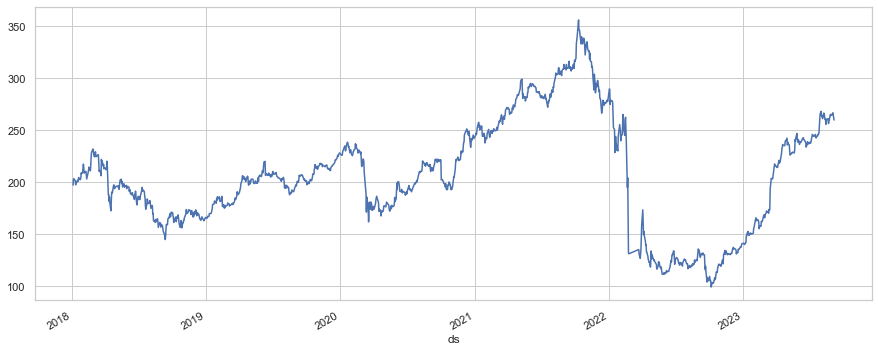

In [182]:
dfs1.y.plot(figsize=(15,6))

<AxesSubplot:xlabel='ds'>

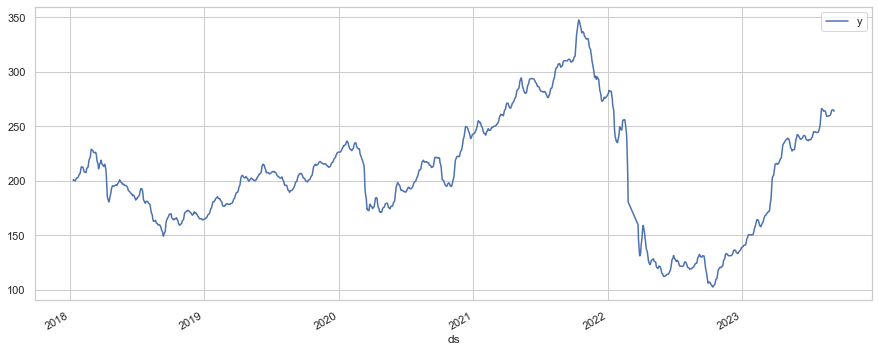

In [183]:
dfs1.rolling(5).mean().plot(figsize=(15,6))

In [150]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['y'].shift(lag)

    data['y_mean'] = data['y'].shift().rolling(rolling_mean_size).mean().copy()

In [151]:
make_features(dfs1, 7, 3)
dfs1.dropna(inplace=True)
dfs1

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2018-01-15,201.90,2018,1,15,0,0,199.49,199.78,197.52,201.30,203.50,203.03,197.30,198.930000
2018-01-16,200.82,2018,1,16,1,0,201.90,199.49,199.78,197.52,201.30,203.50,203.03,200.390000
2018-01-17,201.34,2018,1,17,2,0,200.82,201.90,199.49,199.78,197.52,201.30,203.50,200.736667
2018-01-18,204.63,2018,1,18,3,0,201.34,200.82,201.90,199.49,199.78,197.52,201.30,201.353333
2018-01-19,203.97,2018,1,19,4,0,204.63,201.34,200.82,201.90,199.49,199.78,197.52,202.263333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,264.61,2023,9,1,4,0,264.75,264.25,265.17,265.20,259.88,258.92,256.47,264.723333
2023-09-04,266.82,2023,9,4,0,0,264.61,264.75,264.25,265.17,265.20,259.88,258.92,264.536667
2023-09-05,264.63,2023,9,5,1,0,266.82,264.61,264.75,264.25,265.17,265.20,259.88,265.393333


In [152]:
features = dfs1.drop(['y'],axis = 1)
target = dfs1['y']
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (1058, 13)
X_test (353, 13)


In [153]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [154]:
y_predicted_lr = model_lr.predict(X_test)
y_predicted_lr

array([132.61615977, 132.3981541 , 129.1651914 , 124.96247237,
       124.62999575, 122.95935763, 123.39958502, 119.14878366,
       124.89805836, 134.73839791, 127.49351682, 130.10021389,
       126.25738217, 124.12936637, 124.50601958, 121.12875589,
       116.16297779, 116.89796768, 120.05837704, 124.21442232,
       123.13629398, 122.93932138, 120.96780898, 117.0699951 ,
       118.50677467, 116.28359586, 113.22576904, 112.1655524 ,
       111.9812841 , 111.90941643, 113.37728786, 112.54031438,
       112.76451403, 114.35688019, 113.64381585, 115.21858697,
       114.46961621, 114.52934687, 114.98224233, 116.72473988,
       117.62753553, 119.31220006, 125.49669835, 124.60162356,
       127.71241563, 131.35402402, 131.1526576 , 134.59784741,
       134.43034552, 127.99710822, 120.90472531, 126.23792501,
       127.80159067, 127.91259426, 127.83193027, 126.49432334,
       127.03030976, 122.67301114, 122.41920979, 120.76983343,
       120.04191878, 123.67927078, 123.34170408, 121.74

In [155]:
df1_with_predict = X_test
df1_with_predict['y'] = y_test
df1_with_predict['y_predicted_lr'] = y_predicted_lr
df1_with_predict[['y','y_predicted_lr']]

,y,y_predicted_lr
ds,,
2022-04-15,132.90,132.616160
2022-04-18,128.55,132.398154
2022-04-19,125.50,129.165191
2022-04-20,125.05,124.962472
2022-04-21,123.12,124.629996
...,...,...
2023-09-01,264.61,264.373861
2023-09-04,266.82,264.878997
2023-09-05,264.63,266.548569


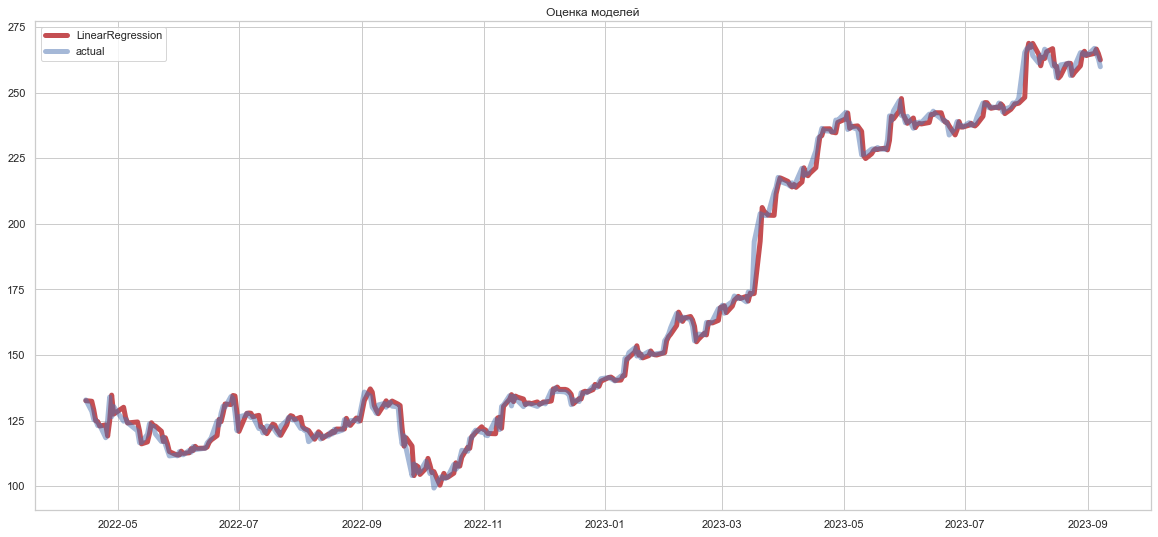

In [156]:
plt.figure(figsize=(20, 9))
plt.plot(df1_with_predict['y_predicted_lr'], "r",linewidth=5, label="LinearRegression")
plt.plot(df1_with_predict['y'],'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

In [157]:
# Посчитаем ошибки модели
print('RMSE тестовой выборки LinearRegression: ', np.sqrt(mean_squared_error(y_test, y_predicted_lr)))
print('MAE тестовой выборки Linear Regression: ', mean_absolute_error(y_test, y_predicted_lr))

RMSE тестовой выборки LinearRegression:  3.1481014282771693
MAE тестовой выборки Linear Regression:  2.1259375299483145


In [158]:
# Добавим в данные на завтра и предскажем курс акции в этот день
dfap = dfs1.tail(1).copy()
dfap['y'] = 0
dfap = dfap.reset_index()
dfap['ds'] = dfap['ds'] + timedelta(days=1)
dfap.set_index('ds', drop=True, inplace=True)

df_new = dfs1.append(dfap)
df_new

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2018-01-15,201.90,2018,1,15,0,0,199.49,199.78,197.52,201.30,203.50,203.03,197.30,198.930000
2018-01-16,200.82,2018,1,16,1,0,201.90,199.49,199.78,197.52,201.30,203.50,203.03,200.390000
2018-01-17,201.34,2018,1,17,2,0,200.82,201.90,199.49,199.78,197.52,201.30,203.50,200.736667
2018-01-18,204.63,2018,1,18,3,0,201.34,200.82,201.90,199.49,199.78,197.52,201.30,201.353333
2018-01-19,203.97,2018,1,19,4,0,204.63,201.34,200.82,201.90,199.49,199.78,197.52,202.263333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04,266.82,2023,9,4,0,0,264.61,264.75,264.25,265.17,265.20,259.88,258.92,264.536667
2023-09-05,264.63,2023,9,5,1,0,266.82,264.61,264.75,264.25,265.17,265.20,259.88,265.393333
2023-09-06,262.94,2023,9,6,2,0,264.63,266.82,264.61,264.75,264.25,265.17,265.20,265.353333


In [159]:
make_features(df_new, 7, 3)
df_new.dropna(inplace=True)
df_new

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2018-01-24,204.20,2018,1,24,2,0,202.71,202.50,203.97,204.63,201.34,200.82,201.90,203.060000
2018-01-25,209.00,2018,1,25,3,0,204.20,202.71,202.50,203.97,204.63,201.34,200.82,203.136667
2018-01-26,208.00,2018,1,26,4,0,209.00,204.20,202.71,202.50,203.97,204.63,201.34,205.303333
2018-01-29,209.90,2018,1,29,0,0,208.00,209.00,204.20,202.71,202.50,203.97,204.63,207.066667
2018-01-30,213.35,2018,1,30,1,0,209.90,208.00,209.00,204.20,202.71,202.50,203.97,208.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04,266.82,2023,9,4,0,0,264.61,264.75,264.25,265.17,265.20,259.88,258.92,264.536667
2023-09-05,264.63,2023,9,5,1,0,266.82,264.61,264.75,264.25,265.17,265.20,259.88,265.393333
2023-09-06,262.94,2023,9,6,2,0,264.63,266.82,264.61,264.75,264.25,265.17,265.20,265.353333


In [160]:
X_test1 = df_new.drop(['y'],axis = 1)
X_test1

,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,
2018-01-24,2018,1,24,2,0,202.71,202.50,203.97,204.63,201.34,200.82,201.90,203.060000
2018-01-25,2018,1,25,3,0,204.20,202.71,202.50,203.97,204.63,201.34,200.82,203.136667
2018-01-26,2018,1,26,4,0,209.00,204.20,202.71,202.50,203.97,204.63,201.34,205.303333
2018-01-29,2018,1,29,0,0,208.00,209.00,204.20,202.71,202.50,203.97,204.63,207.066667
2018-01-30,2018,1,30,1,0,209.90,208.00,209.00,204.20,202.71,202.50,203.97,208.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04,2023,9,4,0,0,264.61,264.75,264.25,265.17,265.20,259.88,258.92,264.536667
2023-09-05,2023,9,5,1,0,266.82,264.61,264.75,264.25,265.17,265.20,259.88,265.393333
2023-09-06,2023,9,6,2,0,264.63,266.82,264.61,264.75,264.25,265.17,265.20,265.353333


In [161]:
yy = model_lr.predict(X_test1)
yy

array([202.49926711, 203.72823349, 208.27991615, ..., 264.84036197,
       262.40643331, 259.27063896])

In [162]:
len(yy)

1405

## Используем Facebok

In [163]:
# https://facebook.github.io/prophet/
from prophet import Prophet

In [164]:
m = Prophet()
df_prophet = dfs[['ds', 'y']]
df_prophet

,ds,y
0,2018-01-03,197.30
1,2018-01-04,203.03
2,2018-01-05,203.50
3,2018-01-09,201.30
4,2018-01-10,197.52
...,...,...
1413,2023-09-01,264.61
1414,2023-09-04,266.82
1415,2023-09-05,264.63
1416,2023-09-06,262.94


In [165]:
m.add_country_holidays(country_name='RU')
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [166]:
future = m.make_future_dataframe(periods=1)
future.tail(7)

,ds
1412,2023-08-31
1413,2023-09-01
1414,2023-09-04
1415,2023-09-05
1416,2023-09-06
1417,2023-09-07
1418,2023-09-08


In [167]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Defender of the Fatherland Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-03,215.623490,199.503135,232.827034,215.623490,215.623490,0.0,0.0,0.0,0.0,...,3.155440,3.155440,3.155440,-2.565151,-2.565151,-2.565151,0.0,0.0,0.0,216.213780
1,2018-01-04,215.417471,198.102421,231.138702,215.417471,215.417471,0.0,0.0,0.0,0.0,...,2.213075,2.213075,2.213075,-2.399179,-2.399179,-2.399179,0.0,0.0,0.0,215.231366
2,2018-01-05,215.211451,199.469451,232.490792,215.211451,215.211451,0.0,0.0,0.0,0.0,...,2.224532,2.224532,2.224532,-2.257619,-2.257619,-2.257619,0.0,0.0,0.0,215.178364
3,2018-01-09,214.387373,199.660384,232.638748,214.387373,214.387373,0.0,0.0,0.0,0.0,...,3.072960,3.072960,3.072960,-1.932316,-1.932316,-1.932316,0.0,0.0,0.0,215.528017
4,2018-01-10,214.181354,199.279392,231.762845,214.181354,214.181354,0.0,0.0,0.0,0.0,...,3.155440,3.155440,3.155440,-1.903477,-1.903477,-1.903477,0.0,0.0,0.0,215.433316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2023-09-04,259.991113,246.837265,280.469624,259.991113,259.991113,0.0,0.0,0.0,0.0,...,2.931707,2.931707,2.931707,0.083262,0.083262,0.083262,0.0,0.0,0.0,263.006082
1415,2023-09-05,260.402043,247.513208,280.664977,260.402043,260.402043,0.0,0.0,0.0,0.0,...,3.072960,3.072960,3.072960,0.106543,0.106543,0.106543,0.0,0.0,0.0,263.581546
1416,2023-09-06,260.812973,247.047355,280.380762,260.812973,260.812973,0.0,0.0,0.0,0.0,...,3.155440,3.155440,3.155440,0.142097,0.142097,0.142097,0.0,0.0,0.0,264.110510
1417,2023-09-07,261.223903,246.514792,280.911601,261.223903,261.223903,0.0,0.0,0.0,0.0,...,2.213075,2.213075,2.213075,0.186175,0.186175,0.186175,0.0,0.0,0.0,263.623153


In [168]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]#.tail(15)

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-03,216.213780,199.503135,232.827034
1,2018-01-04,215.231366,198.102421,231.138702
2,2018-01-05,215.178364,199.469451,232.490792
3,2018-01-09,215.528017,199.660384,232.638748
4,2018-01-10,215.433316,199.279392,231.762845
...,...,...,...,...
1414,2023-09-04,263.006082,246.837265,280.469624
1415,2023-09-05,263.581546,247.513208,280.664977
1416,2023-09-06,264.110510,247.047355,280.380762
1417,2023-09-07,263.623153,246.514792,280.911601


In [169]:
forecast.set_index('ds', inplace=True)

<AxesSubplot:xlabel='ds'>

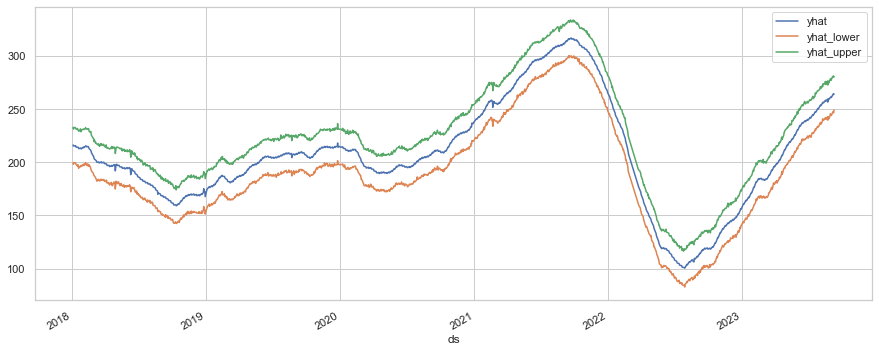

In [170]:
forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']].plot(figsize=(15,6))

In [171]:
print("RMSE on Prophet: ",np.sqrt(mean_squared_error(dfs['y'], forecast.yhat[:-1])))

RMSE on Prophet:  13.079729615779705


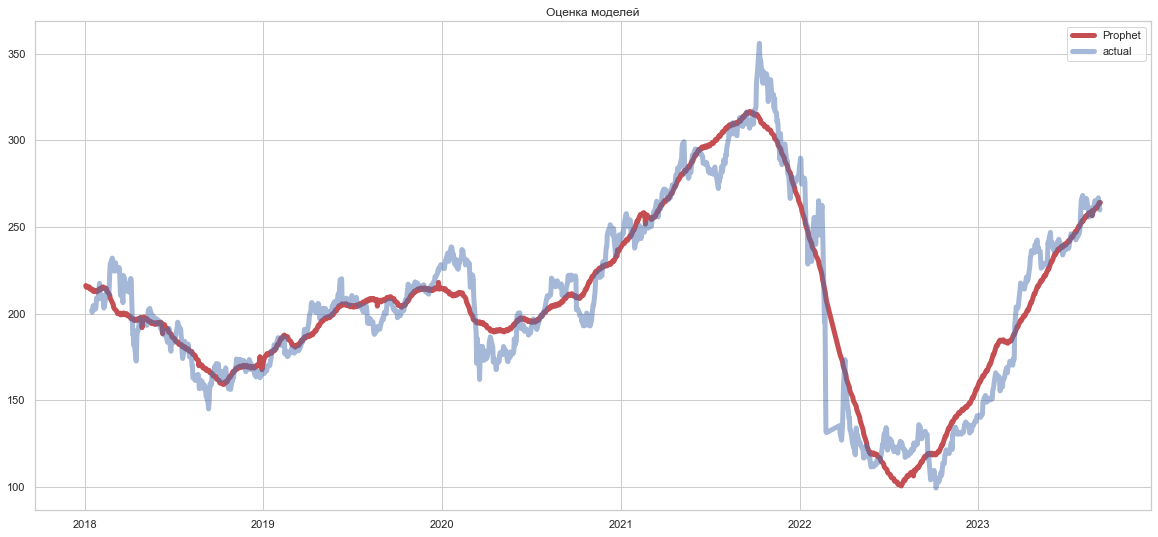

In [172]:
plt.figure(figsize=(20, 9))
plt.plot(forecast['yhat'], "r",linewidth=5, label="Prophet")
plt.plot(dfs1['y'],'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

# Сравниваем результаты

In [173]:
len(yy)

1405

In [184]:
df1_with_predict = X_test1.tail(1000)
df1_with_predict['y'] = y_test.tail(1000)
df1_with_predict['y_predicted_lr'] = yy[-1000:]
df1_with_predict['y_prophet'] = forecast.yhat[-1000:]
df1_with_predict[['y','y_predicted_lr', 'y_prophet']]

,y,y_predicted_lr,y_prophet
ds,,,
2019-08-29,NaN,192.261978,206.772059
2019-08-30,NaN,193.461044,206.807990
2019-09-02,NaN,195.668705,207.724445
2019-09-03,NaN,198.151823,207.977960
2019-09-04,NaN,197.189641,208.190957
...,...,...,...
2023-09-04,266.82,264.878997,263.006082
2023-09-05,264.63,266.548569,263.581546
2023-09-06,262.94,264.840362,264.110510


<AxesSubplot:xlabel='ds'>

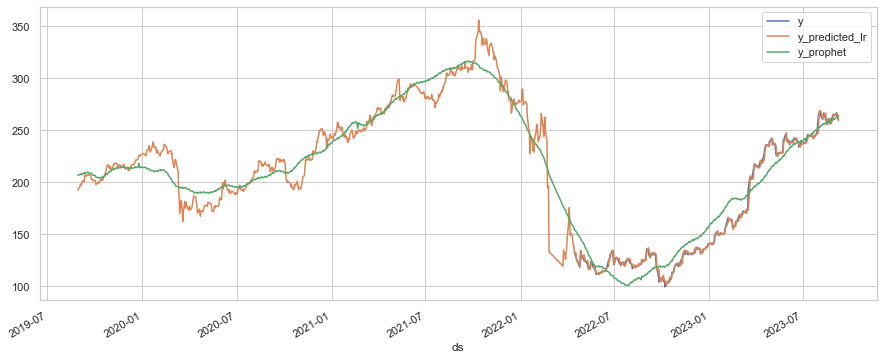

In [185]:
df1_with_predict[[ 'y', 'y_predicted_lr', 'y_prophet']].plot(figsize=(15,6))

In [176]:
if __name__ == '__main__':
     print("успешно выполнено")

успешно выполнено
